In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import mrmr
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import pymrmr
from scipy.stats import kruskal, mannwhitneyu, kendalltau, spearmanr
from boruta import BorutaPy
import umap.umap_ as umap
import icikt
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif as MIC
from minepy import MINE
import random

random.seed(10)

# Import data

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

ACAP3  ACTRT2  AGRN  ANKRD65  ATAD3A  ATAD3B  ATAD3C  AURKAIP1  \
TCGA-3C-AALI     -1      -1    -1       -1      -1      -1      -1        -1   
TCGA-3C-AALK      0       0     0        0       0       0       0         0   
TCGA-4H-AAAK      0       0     0        0       0       0       0         0   
TCGA-5L-AAT1      0       0     0        0       0       0       0         0   
TCGA-5T-A9QA     -1      -1    -1       -1      -1      -1      -1        -1   

              B3GALT6  C1orf159  ...  SMIM9  SNORA36A  SNORA56  TMLHE  VBP1  \
TCGA-3C-AALI       -1        -1  ...     -1        -1       -1     -1    -1   
TCGA-3C-AALK        0         0  ...      0         0        0      0     0   
TCGA-4H-AAAK        0         0  ...      0         0        0      0     0   
TCGA-5L-AAT1        0         0  ...      0         0        0      0     0   
TCGA-5T-A9QA       -1        -1  ...      0         0        0      0     0   

              IL9R|ENSG00000124334.12  SPRY3|ENSG00000168939.6  \
TCGA-3C-AALI                       -1                       -1   
TCGA-3C-AALK                        0                        0   
TCGA-4H-AAAK                        0                        0   
TCGA-5L-AAT1                        0                        0   
TCGA-5T-A9QA                        0                        0   

              VAMP7|ENSG00000124333.10  WASH6P|ENSG00000182484.10  \
TCGA-3C-AALI                        -1                         -1   
TCGA-3C-AALK                         0                          0   
TCGA-4H-AAAK                         0                          0   
TCGA-5L-AAT1                         0                          0   
TCGA-5T-A9QA                         0                          0   

              WASIR1|ENSG00000185203.7  
TCGA-3C-AALI                        -1  
TCGA-3C-AALK                         0  
TCGA-4H-AAAK                         0  
TCGA-5L-AAT1                         0  
TCGA-5T-A9QA                         0  

[5 rows x 24776 columns]

In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3  hsa-let-7b  \
TCGA-3C-AALI         49201         98691         49035      148591   
TCGA-3C-AALK         57278        114320         57540      164553   
TCGA-4H-AAAK         67196        134563         67607      136918   
TCGA-5L-AAT1         94243        188921         94346      211457   
TCGA-5T-A9QA         49313         97721         49623      127544   

              hsa-let-7c  hsa-let-7d  hsa-let-7e  hsa-let-7f-1  hsa-let-7f-2  \
TCGA-3C-AALI        5095        3263        3566           133         41683   
TCGA-3C-AALK       18464        2114        8364           113         40723   
TCGA-4H-AAAK       20429        2162       10556           139         50848   
TCGA-5L-AAT1       21076        2657       12104           272         94610   
TCGA-5T-A9QA        2134        1769        8190           104         28306   

              hsa-let-7g  ...  hsa-mir-941-3  hsa-mir-941-4  hsa-mir-942  \
TCGA-3C-AALI        2231  ...              0              0           52   
TCGA-3C-AALK        2245  ...              0              0           22   
TCGA-4H-AAAK        2056  ...              0              0           13   
TCGA-5L-AAT1        3903  ...              0              0           23   
TCGA-5T-A9QA        2792  ...              0              0           72   

              hsa-mir-943  hsa-mir-944  hsa-mir-95  hsa-mir-96  hsa-mir-98  \
TCGA-3C-AALI            0            4           8         383         547   
TCGA-3C-AALK            0           22          11         459         263   
TCGA-4H-AAAK            0            7           5         123         212   
TCGA-5L-AAT1            0           12          11         235         529   
TCGA-5T-A9QA            0            3          23         186         146   

              hsa-mir-99a  hsa-mir-99b  
TCGA-3C-AALI         1503        80378  
TCGA-3C-AALK         6620       152218  
TCGA-4H-AAAK         6666       158568  
TCGA-5L-AAT1         5352       196557  
TCGA-5T-A9QA          445       127728  

[5 rows x 1046 columns]

In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

A1BG  A1CF  A2BP1   A2LD1  A2ML1       A2M  A4GALT  A4GNT  \
TCGA-3C-AALI  436.55     0      0  130.32      8  13924.87     290      1   
TCGA-3C-AALK  461.69     0      0  151.08      4  26490.85    1224      0   
TCGA-4H-AAAK  631.87     1      9  362.77      8  22525.79     804      1   
TCGA-5L-AAT1  259.26     0      0  125.12      5  18903.93     323      1   
TCGA-5T-A9QA  600.72     1      1  446.68      0   6084.91     787      7   

              AAA1  AAAS  ...  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B    ZYX  ZZEF1  \
TCGA-3C-AALI     0  1633  ...   110   825  2470     365    1110  10123   2425   
TCGA-3C-AALK     0  1878  ...   133  1058  2088     424    1468  13756   1888   
TCGA-4H-AAAK     1  1925  ...   115   997  2467      33    1823   9498   1955   
TCGA-5L-AAT1     0   971  ...    55   697  1213      66     630   5421   1732   
TCGA-5T-A9QA     0  1670  ...    55   547  1548       4     615   6160   2132   

              ZZZ3  psiTPTE22  tAKR  
TCGA-3C-AALI   748       1704     0  
TCGA-3C-AALK  1694        161     0  
TCGA-4H-AAAK  2072        440     0  
TCGA-5L-AAT1   698         71     0  
TCGA-5T-A9QA   843          7     0  

[5 rows x 20501 columns]

In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

14-3-3_beta  14-3-3_epsilon  14-3-3_zeta    4E-BP1  4E-BP1_pS65  \
TCGA-3C-AALI    -0.000752        0.022553     0.021112  0.101796    -0.382850   
TCGA-3C-AALK    -0.202252        0.077041     0.153997  0.299107    -0.438903   
TCGA-4H-AAAK    -0.208434        0.062566     0.034209  0.429696    -0.102852   
TCGA-5L-AAT1    -0.465476        0.141845     0.232721  0.427772    -0.231596   
TCGA-5T-A9QA    -0.354823        0.156575     0.249023  1.197526     0.447913   

              4E-BP1_pT37_T46  4E-BP1_pT70     53BP1     A-Raf  A-Raf_pS299  \
TCGA-3C-AALI        -0.108997     0.103860 -0.335720  0.139450     0.148123   
TCGA-3C-AALK        -0.460678    -0.358195  0.474016  0.376476    -0.160318   
TCGA-4H-AAAK        -0.499466    -0.433138  0.143794  0.339525    -0.221161   
TCGA-5L-AAT1         0.276124    -0.411702  0.736283  0.398665    -0.063979   
TCGA-5T-A9QA         1.001215     0.307314  0.581762  0.316779    -0.085146   

              ...  p27_pT157  p27_pT198  p38_MAPK  p38_pT180_Y182       p53  \
TCGA-3C-AALI  ...  -0.076626  -0.231296 -0.169884        0.040360 -0.043975   
TCGA-3C-AALK  ...  -0.219547  -0.340080  0.208381        0.365363 -0.136875   
TCGA-4H-AAAK  ...  -0.070647  -0.471717 -0.052702        0.068514 -0.080364   
TCGA-5L-AAT1  ...  -0.145362  -0.582255  0.346637        0.289421 -0.225658   
TCGA-5T-A9QA  ...   0.076588  -0.325001  0.166015       -1.064492  0.181296   

              p62-LCK-ligand    p70S6K  p70S6K_pT389    p90RSK  \
TCGA-3C-AALI        1.293687  0.783984      0.162565 -0.667649   
TCGA-3C-AALK        0.680809  0.612644     -0.131174  0.419210   
TCGA-4H-AAAK        0.300677  0.819253     -0.520017  0.003252   
TCGA-5L-AAT1        0.591818  0.623455     -0.559783  0.510494   
TCGA-5T-A9QA       -0.226434  0.842169      0.280629  0.524148   

              p90RSK_pT359_S363  
TCGA-3C-AALI          -0.102581  
TCGA-3C-AALK          -0.118623  
TCGA-4H-AAAK          -0.855659  
TCGA-5L-AAT1          -0.601296  
TCGA-5T-A9QA          -0.500144  

[5 rows x 216 columns]

# Import label

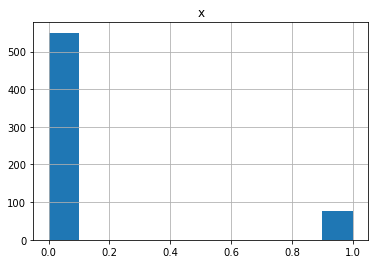

In [6]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [7]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [8]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [9]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [10]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [11]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [12]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [13]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
    return data

# Normalize and filter datasets

In [14]:
dataset_dict = {'cnv': cnv, 'mirna': miRNA, 'mrna': mRNA, 'proteins': proteins}

In [15]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        if key != 'cnv':
            dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
        else:
            dict_filtered_nornalize[key] = value
    return dict_filtered_nornalize

# Store and retrieve data normalize and filtered

In [16]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

In [17]:
def store_filtered_normalize_data(dataset_dict):
    if not os.path.exists('filtered_normalize_data'):
        mkdir_p('filtered_normalize_data')
        filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)
        for data in dataset_dict:
            filtered_normalize_data[data].to_json('filtered_normalize_data/'+data+'.json')

In [18]:
def load_filtered_normalize_data(dataset_dict):
    dict_test = {}
    if os.path.exists('filtered_normalize_data'):
        for data in dataset_dict:
            with open('filtered_normalize_data/'+data+'.json', 'r') as fp:
                dataset = pd.read_json(fp)
                dict_test[data] = dataset
        return dict_test
    else:
        store_filtered_normalize_data(dataset_dict)
        load_filtered_normalize_data(dataset_dict)

In [19]:
%time datasets = load_filtered_normalize_data(dataset_dict)

CPU times: user 7.9 s, sys: 776 ms, total: 8.68 s
Wall time: 9.49 s


In [20]:
datasets

{'cnv':               ACAP3  ACTRT2  AGRN  ANKRD65  ATAD3A  ATAD3B  ATAD3C  AURKAIP1  \
 TCGA-3C-AALI     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-3C-AALK      0       0     0        0       0       0       0         0   
 TCGA-4H-AAAK      0       0     0        0       0       0       0         0   
 TCGA-5L-AAT1      0       0     0        0       0       0       0         0   
 TCGA-5T-A9QA     -1      -1    -1       -1      -1      -1      -1        -1   
 ...             ...     ...   ...      ...     ...     ...     ...       ...   
 TCGA-W8-A86G      0       0     0        0       0       0       0         0   
 TCGA-WT-AB41     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-XX-A899      0       0     0        0       0       0       0         0   
 TCGA-Z7-A8R5     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-Z7-A8R6      0       0     0        0       0       0       0         0   
 
               B3GA

In [21]:
#baseline AUPRC
label[label['x'] == 1].count()/len(label)

x    0.122807
dtype: float64

In [22]:
#Numero positivi
label[label['x'] == 1].count()

x    77
dtype: int64

# Correlation with Spearman on cnv

In [23]:
p_value_threshold = 0.05
correlation_threshold = 0.01

In [24]:
def compute_spearmanr_with_label(dataset, label):
    not_correlated_features = []
    for feature in tqdm(dataset.columns, desc=f"Running Spearman test on cnv", dynamic_ncols=True, leave=False):
        correlation, p_value = spearmanr(dataset[feature].values.flatten(), label.values.flatten())
        if p_value > p_value_threshold:
            #print(f"In cnv the feature {feature} does not correlate in a statistically significant manner with the output. p-value:{p_value} -- correlation:{correlation}")
            not_correlated_features.append(feature)
    return not_correlated_features

In [25]:
def spearmanr_between_feature(
    X:pd.DataFrame,
    feature_left: str,
    feature_right: str,
):
    """Returns Spearman correlation.
    
    Parameters
    ----------------------
    X:pd.DataFrame,
        The epigenomic data.
    feature_left: str,
        The left features to compute pearson for.
    feature_right: str,
        The right features to compute pearson for.
    """
    correlation, p_value = spearmanr(
        X[feature_left].values.flatten(),
        X[feature_right].values.flatten(),
    )
    return dict(
        correlation=correlation,
        p_value=p_value
    )

In [26]:
def compute_spearmanr_between_feature(dataset):
    spearman_result = []
    score = []
    highly_correlated_future = []
    for feature_left in tqdm(dataset.columns, desc=f"Running Spearman test", dynamic_ncols=True, leave=False):
        for feature_right in dataset.columns:
                spearman_result  = spearmanr_between_feature(dataset,feature_left,feature_right)
                
                score.append(spearman_result)
                if feature_left!=feature_right and spearman_result["p_value"] < p_value_threshold and np.abs(spearman_result["correlation"]) > 0.95:
                    correlation = spearman_result["correlation"]
                    #print(f"The feature {feature_left} is highly correlated with {feature_right} ({correlation}).")
                    highly_correlated_future.append(feature_left)
    return highly_correlated_future

## Creation cnv dataset after drop feature not correlated with output and features with higly correlations with other features

In [27]:
def compute_all_spearman(dataset, label):
    #Drop features not correlated with output
    new_df = dataset.drop(compute_spearmanr_with_label(dataset, label), axis=1)
    high_correlated_feature = compute_spearmanr_between_feature(new_df)
    return new_df.drop(high_correlated_feature, axis=1).columns

# Correlation with Mine: Mic

In [28]:
def compute_mine(dataset, label):
    feature_to_drop = []
    for feature in tqdm(dataset.columns, desc=f"Running MINE test", dynamic_ncols=True, leave=False):
        mine = MINE()
        mine.compute_score(dataset[feature].values.ravel(), label.values.ravel())
        score = mine.mic()
        if score < correlation_threshold:
            feature_to_drop.append(feature)
    return dataset.drop(feature_to_drop, axis=1).columns

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [29]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [30]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

# Umap

In [31]:
#init='random'
def execute_umap(n_components, X, y):
    return umap.UMAP(n_neighbors=5, n_components=n_components, random_state=42).fit_transform(X, y)

# Multivariate feature selection, mrmr and Boruta

In [32]:
def execute_mrmr(dataset, n_feature):
    return mRMR(dataset, 'MIQ', n_feature)

In [33]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """
    
    print('execute boruta')

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

# Train

In [34]:
def train_model(key, label, num_extenal_fold, type_feature_selection, datasets):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: string,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu',
    use_umap: bool,
        Specified to use or not use UMAP for feature extraction after univariate feature selection (kruskal, mannwhitneyu)
    """
    _, ax = plt.subplots(figsize=(10, 10))
    average_precision_scores =[]
    dataset = datasets[key]
    y_score_concatenated = []
    y_test_fold_concatenated = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    iterator = 0
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in tqdm(external_fold.split(X_numpy, label), desc=f"Running fold ", dynamic_ncols=True, leave=False):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        
        #feature selection
        if 'kruskal' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, 0.05)
        elif 'mannwhitneyu' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, 0.05)
        elif type_feature_selection == "mrmr":
            selected_features = execute_mrmr(df_X_train, 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        elif type_feature_selection == 'mine':
            selected_features = compute_mine(df_X_train, df_y_train)
        elif type_feature_selection == 'spearman':
            selected_features = compute_all_spearman(df_X_train, df_y_train)
        else:
            return "Invalid type of feature selection"
              
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]
        
        
        if 'umap' in type_feature_selection:
            X_train_selected_feature = execute_umap(50, X_train_selected_feature, y_train_fold)
            X_test_selected_feature = execute_umap(50, X_test_selected_feature , y_test_fold)
            
        clf = GridSearchCV(estimator=RandomForestClassifier(),
                           scoring='average_precision',
                           param_grid=model_selection_grid_DT, 
                           cv=2, 
                           n_jobs=-1)
        clf.fit(X_train_selected_feature, y_train_fold)
    
        # Get the predicited probability of testing data
        y_score = clf.predict_proba(X_test_selected_feature)[:, 1]
        
        avg_precision_score = average_precision_score(y_test_fold, y_score)
        average_precision_scores.append(avg_precision_score)
        
        #concatenation of result for external AUPRC
        y_score_concatenated = np.concatenate((y_score_concatenated, y_score), axis=None)
        y_test_fold_concatenated = np.concatenate((y_test_fold_concatenated, y_test_fold), axis=None)
               
        PrecisionRecallDisplay.from_predictions(y_test_fold, y_score, ax=ax,name=f'Result on {iterator} fold:')

        plt.title('Random_Forest internal')
        ax.legend(title='AUPRC')
        
        iterator = iterator +1
    plt.savefig('Result/Many_Feature_Selection_notebook/'+key+'/'+type_feature_selection+'_'+'AUPRC_Internal.pdf')
    
    internal_average_precision_score = np.mean(average_precision_scores)
    
    external_average_precision_score = average_precision_score(y_test_fold_concatenated, y_score_concatenated)

    #plot precision recall curve
    PrecisionRecallDisplay.from_predictions(y_test_fold_concatenated, y_score_concatenated,name='Concat of predictions')

    plt.title('Random_Forest external')
    plt.legend(title='AUPRC')
    plt.savefig('Result/Many_Feature_Selection_notebook/'+key+'/'+type_feature_selection+'_'+'AUPRC_External.pdf')
    
    return '{0:.4f}'.format(internal_average_precision_score), '{0:.4f}'.format(external_average_precision_score), str(clf.best_estimator_)

In [36]:
model_selection_grid_DT = [
    {'criterion': ['gini', 'entropy'],
     'max_leaf_nodes': [None, 2, 5, 10],
     'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [51, 101, 251, 500]}
]

# Train all datasets with combination of feature selection and feature extraction 

In [37]:
files_name = ['Result/Many_Feature_Selection_notebook/proteins/proteins.json',
              'Result/Many_Feature_Selection_notebook/miRNA/mRNA.json',
              'Result/Many_Feature_Selection_notebook/mRNA/miRNA.json',
              'Result/Many_Feature_Selection_notebook/cnv/cnv.json']
dataset_list = ['proteins', 'mrna', 'mirna', 'cnv']
feature_selection_list = ['mannwhitneyu', 'mrmr', 'mannwhitneyu_with_umap']

In [38]:
def create_result_json(result_dict, feature_selection_list, files_name, dataset_list, label, datasets,):
    for file_name, key in tqdm(zip(files_name, dataset_list), desc=f"Running training ", dynamic_ncols=True, leave=False):
        #print(f'FILE NAME {file_name}')
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                result_dict[key] = saved_dict
                for feature_selection in tqdm(feature_selection_list,desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                    print(f'TECNICA DI FS exist {feature_selection}')
                    if not feature_selection in result_dict[key].keys():
                        result_dict[key][feature_selection] = {}    
                        result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'], result_dict[key][feature_selection]['best_estimator'] = train_model(key, label, 10, feature_selection, datasets)
                        with open(file_name, 'w', encoding='utf-8') as fp:
                            json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)
        else:
            result_dict[key] = {}
            for feature_selection in tqdm(feature_selection_list, desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                print(f'TECNICA DI FS check {feature_selection}')
                print(f'file name {file_name}')
                result_dict[key][feature_selection] = {}    
                result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'], result_dict[key][feature_selection]['best_estimator'] = train_model(key, label, 10, feature_selection, datasets)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)

# Create cnv result using spearman

In [40]:
result_dict = {}

dataset_list = ['cnv']
cnv_file_name = ['Result/Many_Feature_Selection_notebook/cnv/cnv.json']
feature_selection_list_cnv = ['spearman']

!mkdir 'Result'
!mkdir  'Result/Many_Feature_Selection_notebook'

mkdir: impossibile creare la directory "Result": File già esistente
mkdir: impossibile creare la directory "Result/Many_Feature_Selection_notebook": File già esistente


Running training : 0it [00:00, ?it/s]
Running cnv training :   0%|                                                                                                                                                                 | 0/1 [00:00<?, ?it/s]

TECNICA DI FS check spearman
file name Result/Many_Feature_Selection_notebook/cnv/cnv.json




Running fold : 0it [00:00, ?it/s]


Running Spearman test on cnv:   0%|                                                                                                                                                      | 0/24776 [00:00<?, ?it/s]


Running Spearman test on cnv:   2%|███▏                                                                                                                                      | 579/24776 [00:00<00:04, 5781.13it/s]


Running Spearman test on cnv:   5%|██████▍                                                                                                                                  | 1162/24776 [00:00<00:04, 5808.92it/s]


Running Spearman test on cnv:   7%|█████████▊                                                                                                                               | 1770/24776 [00:00<00:03, 5929.87it/s]


Running Spearman test on cnv:  10%|█████████████▏                                                         

Running Spearman test:   4%|█████▌                                                                                                                                                | 29/790 [00:03<01:28,  8.59it/s]


Running Spearman test:   4%|█████▋                                                                                                                                                | 30/790 [00:03<01:28,  8.62it/s]


Running Spearman test:   4%|█████▉                                                                                                                                                | 31/790 [00:03<01:27,  8.64it/s]


Running Spearman test:   4%|██████                                                                                                                                                | 32/790 [00:03<01:27,  8.66it/s]


Running Spearman test:   4%|██████▎                                                                                                             

Running Spearman test:  13%|███████████████████                                                                                                                                  | 101/790 [00:11<01:19,  8.64it/s]


Running Spearman test:  13%|███████████████████▏                                                                                                                                 | 102/790 [00:11<01:19,  8.66it/s]


Running Spearman test:  13%|███████████████████▍                                                                                                                                 | 103/790 [00:11<01:19,  8.67it/s]


Running Spearman test:  13%|███████████████████▌                                                                                                                                 | 104/790 [00:12<01:19,  8.67it/s]


Running Spearman test:  13%|███████████████████▊                                                                                                

Running Spearman test:  22%|████████████████████████████████▋                                                                                                                    | 173/790 [00:20<01:11,  8.67it/s]


Running Spearman test:  22%|████████████████████████████████▊                                                                                                                    | 174/790 [00:20<01:11,  8.67it/s]


Running Spearman test:  22%|█████████████████████████████████                                                                                                                    | 175/790 [00:20<01:10,  8.68it/s]


Running Spearman test:  22%|█████████████████████████████████▏                                                                                                                   | 176/790 [00:20<01:10,  8.68it/s]


Running Spearman test:  22%|█████████████████████████████████▍                                                                                  

Running Spearman test:  31%|██████████████████████████████████████████████▏                                                                                                      | 245/790 [00:28<01:03,  8.62it/s]


Running Spearman test:  31%|██████████████████████████████████████████████▍                                                                                                      | 246/790 [00:28<01:03,  8.63it/s]


Running Spearman test:  31%|██████████████████████████████████████████████▌                                                                                                      | 247/790 [00:28<01:02,  8.62it/s]


Running Spearman test:  31%|██████████████████████████████████████████████▊                                                                                                      | 248/790 [00:28<01:02,  8.63it/s]


Running Spearman test:  32%|██████████████████████████████████████████████▉                                                                     

Running Spearman test:  40%|███████████████████████████████████████████████████████████▊                                                                                         | 317/790 [00:36<00:54,  8.63it/s]


Running Spearman test:  40%|███████████████████████████████████████████████████████████▉                                                                                         | 318/790 [00:36<00:54,  8.63it/s]


Running Spearman test:  40%|████████████████████████████████████████████████████████████▏                                                                                        | 319/790 [00:36<00:54,  8.63it/s]


Running Spearman test:  41%|████████████████████████████████████████████████████████████▎                                                                                        | 320/790 [00:37<00:54,  8.64it/s]


Running Spearman test:  41%|████████████████████████████████████████████████████████████▌                                                       

Running Spearman test:  49%|█████████████████████████████████████████████████████████████████████████▎                                                                           | 389/790 [00:45<00:46,  8.60it/s]


Running Spearman test:  49%|█████████████████████████████████████████████████████████████████████████▌                                                                           | 390/790 [00:45<00:46,  8.59it/s]


Running Spearman test:  49%|█████████████████████████████████████████████████████████████████████████▋                                                                           | 391/790 [00:45<00:46,  8.59it/s]


Running Spearman test:  50%|█████████████████████████████████████████████████████████████████████████▉                                                                           | 392/790 [00:45<00:46,  8.61it/s]


Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████                                          

Running Spearman test:  58%|██████████████████████████████████████████████████████████████████████████████████████▉                                                              | 461/790 [00:53<00:38,  8.64it/s]


Running Spearman test:  58%|███████████████████████████████████████████████████████████████████████████████████████▏                                                             | 462/790 [00:53<00:38,  8.63it/s]


Running Spearman test:  59%|███████████████████████████████████████████████████████████████████████████████████████▎                                                             | 463/790 [00:53<00:37,  8.62it/s]


Running Spearman test:  59%|███████████████████████████████████████████████████████████████████████████████████████▌                                                             | 464/790 [00:53<00:37,  8.62it/s]


Running Spearman test:  59%|███████████████████████████████████████████████████████████████████████████████████████▋                            

Running Spearman test:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 533/790 [01:01<00:29,  8.60it/s]


Running Spearman test:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 534/790 [01:01<00:29,  8.62it/s]


Running Spearman test:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 535/790 [01:01<00:29,  8.63it/s]


Running Spearman test:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 536/790 [01:02<00:29,  8.61it/s]


Running Spearman test:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              

Running Spearman test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 605/790 [01:10<00:21,  8.63it/s]


Running Spearman test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 606/790 [01:10<00:21,  8.63it/s]


Running Spearman test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 607/790 [01:10<00:21,  8.63it/s]


Running Spearman test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 608/790 [01:10<00:21,  8.62it/s]


Running Spearman test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ 

Running Spearman test:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 677/790 [01:18<00:13,  8.61it/s]


Running Spearman test:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 678/790 [01:18<00:12,  8.62it/s]


Running Spearman test:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 679/790 [01:18<00:12,  8.62it/s]


Running Spearman test:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 680/790 [01:18<00:12,  8.62it/s]


Running Spearman test:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 749/790 [01:26<00:04,  8.55it/s]


Running Spearman test:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 750/790 [01:26<00:04,  8.53it/s]


Running Spearman test:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 751/790 [01:27<00:04,  8.54it/s]


Running Spearman test:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 752/790 [01:27<00:04,  8.54it/s]


Running Spearman test:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test on cnv:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 17983/24776 [00:03<00:01, 6075.59it/s]


Running Spearman test on cnv:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 18599/24776 [00:03<00:01, 6098.08it/s]


Running Spearman test on cnv:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 19214/24776 [00:03<00:00, 6111.24it/s]


Running Spearman test on cnv:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 19827/24776 [00:03<00:00, 6089.06it/s]


Running Spearman test on cnv:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  23%|█████████████████████████████████▌                                                                                                                   | 118/524 [00:09<00:31, 12.99it/s]


Running Spearman test:  23%|██████████████████████████████████                                                                                                                   | 120/524 [00:09<00:31, 12.97it/s]


Running Spearman test:  23%|██████████████████████████████████▋                                                                                                                  | 122/524 [00:09<00:30, 12.99it/s]


Running Spearman test:  24%|███████████████████████████████████▎                                                                                                                 | 124/524 [00:09<00:30, 13.01it/s]


Running Spearman test:  24%|███████████████████████████████████▊                                                                                

Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████▌                                                                          | 262/524 [00:20<00:20, 12.95it/s]


Running Spearman test:  50%|███████████████████████████████████████████████████████████████████████████                                                                          | 264/524 [00:20<00:20, 12.96it/s]


Running Spearman test:  51%|███████████████████████████████████████████████████████████████████████████▋                                                                         | 266/524 [00:20<00:19, 12.96it/s]


Running Spearman test:  51%|████████████████████████████████████████████████████████████████████████████▏                                                                        | 268/524 [00:20<00:19, 12.98it/s]


Running Spearman test:  52%|████████████████████████████████████████████████████████████████████████████▊                                       

Running Spearman test:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 406/524 [00:31<00:09, 13.00it/s]


Running Spearman test:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 408/524 [00:31<00:08, 13.05it/s]


Running Spearman test:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 410/524 [00:31<00:08, 13.06it/s]


Running Spearman test:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 412/524 [00:31<00:08, 13.02it/s]


Running Spearman test:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test on cnv:  27%|████████████████████████████████████▌                                                                                                    | 6620/24776 [00:01<00:03, 5846.01it/s]


Running Spearman test on cnv:  29%|███████████████████████████████████████▊                                                                                                 | 7206/24776 [00:01<00:03, 5166.43it/s]


Running Spearman test on cnv:  31%|███████████████████████████████████████████▏                                                                                             | 7800/24776 [00:01<00:03, 5375.94it/s]


Running Spearman test on cnv:  34%|██████████████████████████████████████████████▏                                                                                          | 8351/24776 [00:01<00:03, 5413.00it/s]


Running Spearman test on cnv:  36%|█████████████████████████████████████████████████▌                                                           

Running Spearman test:  21%|███████████████████████████████▍                                                                                                                      | 80/382 [00:04<00:17, 17.60it/s]


Running Spearman test:  21%|████████████████████████████████▏                                                                                                                     | 82/382 [00:04<00:17, 17.58it/s]


Running Spearman test:  22%|████████████████████████████████▉                                                                                                                     | 84/382 [00:04<00:16, 17.62it/s]


Running Spearman test:  23%|█████████████████████████████████▊                                                                                                                    | 86/382 [00:04<00:16, 17.70it/s]


Running Spearman test:  23%|██████████████████████████████████▌                                                                                 

Running Spearman test:  59%|███████████████████████████████████████████████████████████████████████████████████████▎                                                             | 224/382 [00:12<00:08, 17.96it/s]


Running Spearman test:  59%|████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 226/382 [00:12<00:08, 17.95it/s]


Running Spearman test:  60%|████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 228/382 [00:13<00:08, 17.89it/s]


Running Spearman test:  60%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 230/382 [00:13<00:08, 17.75it/s]


Running Spearman test:  61%|██████████████████████████████████████████████████████████████████████████████████████████▍                         

Running Spearman test:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 368/382 [00:21<00:00, 17.95it/s]


Running Spearman test:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 370/382 [00:21<00:00, 17.92it/s]


Running Spearman test:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 372/382 [00:21<00:00, 17.90it/s]


Running Spearman test:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 374/382 [00:21<00:00, 17.88it/s]


Running Spearman test:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  11%|████████████████▊                                                                                                                                     | 42/375 [00:02<00:18, 18.28it/s]


Running Spearman test:  12%|█████████████████▌                                                                                                                                    | 44/375 [00:02<00:18, 18.26it/s]


Running Spearman test:  12%|██████████████████▍                                                                                                                                   | 46/375 [00:02<00:18, 18.24it/s]


Running Spearman test:  13%|███████████████████▏                                                                                                                                  | 48/375 [00:02<00:17, 18.31it/s]


Running Spearman test:  13%|████████████████████                                                                                                

Running Spearman test:  50%|█████████████████████████████████████████████████████████████████████████▉                                                                           | 186/375 [00:10<00:10, 18.10it/s]


Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████▋                                                                          | 188/375 [00:10<00:10, 17.87it/s]


Running Spearman test:  51%|███████████████████████████████████████████████████████████████████████████▍                                                                         | 190/375 [00:10<00:10, 17.95it/s]


Running Spearman test:  51%|████████████████████████████████████████████████████████████████████████████▎                                                                        | 192/375 [00:10<00:10, 18.03it/s]


Running Spearman test:  52%|█████████████████████████████████████████████████████████████████████████████                                       

Running Spearman test:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 330/375 [00:18<00:02, 17.70it/s]


Running Spearman test:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 332/375 [00:18<00:02, 17.84it/s]


Running Spearman test:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 334/375 [00:18<00:02, 17.93it/s]


Running Spearman test:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 336/375 [00:18<00:02, 18.03it/s]


Running Spearman test:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:   1%|▊                                                                                                                                                      | 5/876 [00:00<01:53,  7.67it/s]


Running Spearman test:   1%|█                                                                                                                                                      | 6/876 [00:00<01:53,  7.69it/s]


Running Spearman test:   1%|█▏                                                                                                                                                     | 7/876 [00:00<01:52,  7.73it/s]


Running Spearman test:   1%|█▍                                                                                                                                                     | 8/876 [00:01<01:51,  7.78it/s]


Running Spearman test:   1%|█▌                                                                                                                  

Running Spearman test:   9%|█████████████▏                                                                                                                                        | 77/876 [00:09<01:41,  7.85it/s]


Running Spearman test:   9%|█████████████▎                                                                                                                                        | 78/876 [00:09<01:41,  7.85it/s]


Running Spearman test:   9%|█████████████▌                                                                                                                                        | 79/876 [00:10<01:41,  7.85it/s]


Running Spearman test:   9%|█████████████▋                                                                                                                                        | 80/876 [00:10<01:41,  7.86it/s]


Running Spearman test:   9%|█████████████▊                                                                                                      

Running Spearman test:  17%|█████████████████████████▎                                                                                                                           | 149/876 [00:19<01:34,  7.72it/s]


Running Spearman test:  17%|█████████████████████████▌                                                                                                                           | 150/876 [00:19<01:33,  7.72it/s]


Running Spearman test:  17%|█████████████████████████▋                                                                                                                           | 151/876 [00:19<01:33,  7.74it/s]


Running Spearman test:  17%|█████████████████████████▊                                                                                                                           | 152/876 [00:19<01:33,  7.76it/s]


Running Spearman test:  17%|██████████████████████████                                                                                          

Running Spearman test:  25%|█████████████████████████████████████▌                                                                                                               | 221/876 [00:28<01:24,  7.77it/s]


Running Spearman test:  25%|█████████████████████████████████████▊                                                                                                               | 222/876 [00:28<01:24,  7.79it/s]


Running Spearman test:  25%|█████████████████████████████████████▉                                                                                                               | 223/876 [00:28<01:24,  7.74it/s]


Running Spearman test:  26%|██████████████████████████████████████                                                                                                               | 224/876 [00:28<01:24,  7.76it/s]


Running Spearman test:  26%|██████████████████████████████████████▎                                                                             

Running Spearman test:  33%|█████████████████████████████████████████████████▊                                                                                                   | 293/876 [00:38<01:15,  7.74it/s]


Running Spearman test:  34%|██████████████████████████████████████████████████                                                                                                   | 294/876 [00:38<01:15,  7.76it/s]


Running Spearman test:  34%|██████████████████████████████████████████████████▏                                                                                                  | 295/876 [00:38<01:14,  7.78it/s]


Running Spearman test:  34%|██████████████████████████████████████████████████▎                                                                                                  | 296/876 [00:38<01:14,  7.80it/s]


Running Spearman test:  34%|██████████████████████████████████████████████████▌                                                                 

Running Spearman test:  42%|██████████████████████████████████████████████████████████████                                                                                       | 365/876 [00:47<01:08,  7.45it/s]


Running Spearman test:  42%|██████████████████████████████████████████████████████████████▎                                                                                      | 366/876 [00:47<01:07,  7.56it/s]


Running Spearman test:  42%|██████████████████████████████████████████████████████████████▍                                                                                      | 367/876 [00:47<01:06,  7.63it/s]


Running Spearman test:  42%|██████████████████████████████████████████████████████████████▌                                                                                      | 368/876 [00:47<01:06,  7.66it/s]


Running Spearman test:  42%|██████████████████████████████████████████████████████████████▊                                                     

Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████▎                                                                          | 437/876 [00:56<00:56,  7.71it/s]


Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████▌                                                                          | 438/876 [00:56<00:56,  7.70it/s]


Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████▋                                                                          | 439/876 [00:56<01:00,  7.26it/s]


Running Spearman test:  50%|██████████████████████████████████████████████████████████████████████████▊                                                                          | 440/876 [00:57<01:01,  7.12it/s]


Running Spearman test:  50%|███████████████████████████████████████████████████████████████████████████                                         

Running Spearman test:  58%|██████████████████████████████████████████████████████████████████████████████████████▌                                                              | 509/876 [01:06<00:49,  7.37it/s]


Running Spearman test:  58%|██████████████████████████████████████████████████████████████████████████████████████▋                                                              | 510/876 [01:06<00:49,  7.42it/s]


Running Spearman test:  58%|██████████████████████████████████████████████████████████████████████████████████████▉                                                              | 511/876 [01:06<00:48,  7.53it/s]


Running Spearman test:  58%|███████████████████████████████████████████████████████████████████████████████████████                                                              | 512/876 [01:06<00:47,  7.60it/s]


Running Spearman test:  59%|███████████████████████████████████████████████████████████████████████████████████████▎                            

Running Spearman test:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 581/876 [01:15<00:38,  7.71it/s]


Running Spearman test:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 582/876 [01:15<00:38,  7.71it/s]


Running Spearman test:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 583/876 [01:15<00:38,  7.71it/s]


Running Spearman test:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 584/876 [01:15<00:38,  7.67it/s]


Running Spearman test:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                

Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 653/876 [01:24<00:28,  7.73it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 654/876 [01:24<00:28,  7.75it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 655/876 [01:25<00:28,  7.76it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 656/876 [01:25<00:28,  7.74it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    

Running Spearman test:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 725/876 [01:34<00:19,  7.80it/s]


Running Spearman test:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 726/876 [01:34<00:19,  7.79it/s]


Running Spearman test:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 727/876 [01:34<00:19,  7.79it/s]


Running Spearman test:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 728/876 [01:34<00:18,  7.80it/s]


Running Spearman test:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 797/876 [01:43<00:10,  7.71it/s]


Running Spearman test:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 798/876 [01:43<00:10,  7.69it/s]


Running Spearman test:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 799/876 [01:43<00:10,  7.67it/s]


Running Spearman test:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 800/876 [01:43<00:09,  7.66it/s]


Running Spearman test:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 869/876 [01:52<00:00,  7.82it/s]


Running Spearman test:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 870/876 [01:52<00:00,  7.81it/s]


Running Spearman test:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 871/876 [01:53<00:00,  7.81it/s]


Running Spearman test: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 872/876 [01:53<00:00,  7.81it/s]


Running Spearman test: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  10%|███████████████▌                                                                                                                                      | 41/394 [00:02<00:20, 17.43it/s]


Running Spearman test:  11%|████████████████▎                                                                                                                                     | 43/394 [00:02<00:20, 17.45it/s]


Running Spearman test:  11%|█████████████████▏                                                                                                                                    | 45/394 [00:02<00:19, 17.46it/s]


Running Spearman test:  12%|█████████████████▉                                                                                                                                    | 47/394 [00:02<00:19, 17.49it/s]


Running Spearman test:  12%|██████████████████▋                                                                                                 

Running Spearman test:  47%|█████████████████████████████████████████████████████████████████████▉                                                                               | 185/394 [00:10<00:12, 17.27it/s]


Running Spearman test:  47%|██████████████████████████████████████████████████████████████████████▋                                                                              | 187/394 [00:10<00:11, 17.33it/s]


Running Spearman test:  48%|███████████████████████████████████████████████████████████████████████▍                                                                             | 189/394 [00:11<00:11, 17.37it/s]


Running Spearman test:  48%|████████████████████████████████████████████████████████████████████████▏                                                                            | 191/394 [00:11<00:11, 17.38it/s]


Running Spearman test:  49%|████████████████████████████████████████████████████████████████████████▉                                           

Running Spearman test:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 329/394 [00:19<00:03, 17.40it/s]


Running Spearman test:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 331/394 [00:19<00:03, 17.40it/s]


Running Spearman test:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 333/394 [00:19<00:03, 17.42it/s]


Running Spearman test:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 335/394 [00:19<00:03, 17.43it/s]


Running Spearman test:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test on cnv:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 23337/24776 [00:03<00:00, 6054.32it/s]


Running Spearman test on cnv:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 23950/24776 [00:04<00:00, 6075.86it/s]


Running Spearman test on cnv:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 24567/24776 [00:04<00:00, 6101.96it/s]


                                                                                                                                                                                                                   


Running Spearman test:   0%|                                                                                                                    

Running Spearman test:  36%|█████████████████████████████████████████████████████▊                                                                                               | 136/377 [00:07<00:13, 18.42it/s]


Running Spearman test:  37%|██████████████████████████████████████████████████████▌                                                                                              | 138/377 [00:07<00:12, 18.42it/s]


Running Spearman test:  37%|███████████████████████████████████████████████████████▎                                                                                             | 140/377 [00:07<00:12, 18.44it/s]


Running Spearman test:  38%|████████████████████████████████████████████████████████                                                                                             | 142/377 [00:07<00:12, 18.43it/s]


Running Spearman test:  38%|████████████████████████████████████████████████████████▉                                                           

Running Spearman test:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 280/377 [00:15<00:05, 18.42it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 282/377 [00:15<00:05, 18.37it/s]


Running Spearman test:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 284/377 [00:15<00:05, 18.36it/s]


Running Spearman test:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 286/377 [00:15<00:04, 18.33it/s]


Running Spearman test:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  

Running Spearman test on cnv:  55%|██████████████████████████████████████████████████████████████████████████▏                                                             | 13515/24776 [00:02<00:01, 6081.41it/s]


Running Spearman test on cnv:  57%|█████████████████████████████████████████████████████████████████████████████▌                                                          | 14126/24776 [00:02<00:01, 6086.27it/s]


Running Spearman test on cnv:  60%|████████████████████████████████████████████████████████████████████████████████▉                                                       | 14742/24776 [00:02<00:01, 6106.45it/s]


Running Spearman test on cnv:  62%|████████████████████████████████████████████████████████████████████████████████████▎                                                   | 15354/24776 [00:02<00:01, 6106.28it/s]


Running Spearman test on cnv:  64%|███████████████████████████████████████████████████████████████████████████████████████▋                     

Running Spearman test:   7%|██████████▍                                                                                                                                           | 52/744 [00:05<01:15,  9.16it/s]


Running Spearman test:   7%|██████████▋                                                                                                                                           | 53/744 [00:05<01:15,  9.16it/s]


Running Spearman test:   7%|██████████▉                                                                                                                                           | 54/744 [00:05<01:15,  9.18it/s]


Running Spearman test:   7%|███████████                                                                                                                                           | 55/744 [00:06<01:14,  9.19it/s]


Running Spearman test:   8%|███████████▎                                                                                                        

Running Spearman test:  17%|████████████████████████▊                                                                                                                            | 124/744 [00:13<01:07,  9.16it/s]


Running Spearman test:  17%|█████████████████████████                                                                                                                            | 125/744 [00:13<01:07,  9.16it/s]


Running Spearman test:  17%|█████████████████████████▏                                                                                                                           | 126/744 [00:13<01:07,  9.16it/s]


Running Spearman test:  17%|█████████████████████████▍                                                                                                                           | 127/744 [00:13<01:07,  9.15it/s]


Running Spearman test:  17%|█████████████████████████▋                                                                                          

Running Spearman test:  26%|███████████████████████████████████████▎                                                                                                             | 196/744 [00:21<00:59,  9.22it/s]


Running Spearman test:  26%|███████████████████████████████████████▍                                                                                                             | 197/744 [00:21<00:59,  9.18it/s]


Running Spearman test:  27%|███████████████████████████████████████▋                                                                                                             | 198/744 [00:21<00:59,  9.17it/s]


Running Spearman test:  27%|███████████████████████████████████████▊                                                                                                             | 199/744 [00:21<00:59,  9.16it/s]


Running Spearman test:  27%|████████████████████████████████████████                                                                            

Running Spearman test:  36%|█████████████████████████████████████████████████████▋                                                                                               | 268/744 [00:29<00:51,  9.19it/s]


Running Spearman test:  36%|█████████████████████████████████████████████████████▊                                                                                               | 269/744 [00:29<00:51,  9.18it/s]


Running Spearman test:  36%|██████████████████████████████████████████████████████                                                                                               | 270/744 [00:29<00:51,  9.17it/s]


Running Spearman test:  36%|██████████████████████████████████████████████████████▎                                                                                              | 271/744 [00:29<00:51,  9.17it/s]


Running Spearman test:  37%|██████████████████████████████████████████████████████▍                                                             

Running Spearman test:  46%|████████████████████████████████████████████████████████████████████                                                                                 | 340/744 [00:37<00:44,  9.08it/s]


Running Spearman test:  46%|████████████████████████████████████████████████████████████████████▎                                                                                | 341/744 [00:37<00:44,  9.05it/s]


Running Spearman test:  46%|████████████████████████████████████████████████████████████████████▍                                                                                | 342/744 [00:37<00:44,  9.07it/s]


Running Spearman test:  46%|████████████████████████████████████████████████████████████████████▋                                                                                | 343/744 [00:37<00:44,  9.08it/s]


Running Spearman test:  46%|████████████████████████████████████████████████████████████████████▉                                               

Running Spearman test:  55%|██████████████████████████████████████████████████████████████████████████████████▌                                                                  | 412/744 [00:45<00:36,  9.09it/s]


Running Spearman test:  56%|██████████████████████████████████████████████████████████████████████████████████▋                                                                  | 413/744 [00:45<00:36,  9.09it/s]


Running Spearman test:  56%|██████████████████████████████████████████████████████████████████████████████████▉                                                                  | 414/744 [00:45<00:36,  9.12it/s]


Running Spearman test:  56%|███████████████████████████████████████████████████████████████████████████████████                                                                  | 415/744 [00:45<00:35,  9.14it/s]


Running Spearman test:  56%|███████████████████████████████████████████████████████████████████████████████████▎                                

Running Spearman test:  65%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 484/744 [00:52<00:28,  9.12it/s]


Running Spearman test:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 485/744 [00:53<00:28,  9.14it/s]


Running Spearman test:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 486/744 [00:53<00:28,  9.14it/s]


Running Spearman test:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 487/744 [00:53<00:28,  9.14it/s]


Running Spearman test:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  

Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 556/744 [01:00<00:21,  8.82it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 557/744 [01:01<00:20,  8.92it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 558/744 [01:01<00:21,  8.85it/s]


Running Spearman test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 559/744 [01:01<00:20,  8.86it/s]


Running Spearman test:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   

Running Spearman test:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 628/744 [01:08<00:12,  9.16it/s]


Running Spearman test:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 629/744 [01:08<00:12,  9.16it/s]


Running Spearman test:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 630/744 [01:09<00:12,  9.16it/s]


Running Spearman test:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 631/744 [01:09<00:12,  9.12it/s]


Running Spearman test:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 700/744 [01:16<00:04,  9.12it/s]


Running Spearman test:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 701/744 [01:16<00:04,  9.10it/s]


Running Spearman test:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 702/744 [01:16<00:04,  9.10it/s]


Running Spearman test:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 703/744 [01:17<00:04,  9.11it/s]


Running Spearman test:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running Spearman test on cnv:  65%|███████████████████████████████████████████████████████████████████████████████████████▊                                                | 15993/24776 [00:02<00:01, 6108.23it/s]


Running Spearman test on cnv:  67%|███████████████████████████████████████████████████████████████████████████████████████████▏                                            | 16608/24776 [00:02<00:01, 6118.65it/s]


Running Spearman test on cnv:  70%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 17230/24776 [00:02<00:01, 6148.04it/s]


Running Spearman test on cnv:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 17848/24776 [00:02<00:01, 6156.73it/s]


Running Spearman test on cnv:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎       

                                                                                                                                                                                                                   

Running fold : 9it [07:57, 44.97s/it]


Running Spearman test on cnv:   0%|                                                                                                                                                      | 0/24776 [00:00<?, ?it/s]


Running Spearman test on cnv:   2%|███▍                                                                                                                                      | 614/24776 [00:00<00:03, 6137.39it/s]


Running Spearman test on cnv:   5%|██████▊                                                                                                                                  | 1229/24776 [00:00<00:03, 6139.75it/s]


Running Spearman test on cnv:   7%|██████████▎                                                           

Running Spearman test:  15%|███████████████████████                                                                                                                               | 57/370 [00:03<00:16, 18.70it/s]


Running Spearman test:  16%|███████████████████████▉                                                                                                                              | 59/370 [00:03<00:16, 18.63it/s]


Running Spearman test:  16%|████████████████████████▋                                                                                                                             | 61/370 [00:03<00:16, 18.62it/s]


Running Spearman test:  17%|█████████████████████████▌                                                                                                                            | 63/370 [00:03<00:16, 18.65it/s]


Running Spearman test:  18%|██████████████████████████▎                                                                                         

Running Spearman test:  54%|████████████████████████████████████████████████████████████████████████████████▉                                                                    | 201/370 [00:10<00:09, 18.58it/s]


Running Spearman test:  55%|█████████████████████████████████████████████████████████████████████████████████▋                                                                   | 203/370 [00:10<00:08, 18.62it/s]


Running Spearman test:  55%|██████████████████████████████████████████████████████████████████████████████████▌                                                                  | 205/370 [00:11<00:08, 18.63it/s]


Running Spearman test:  56%|███████████████████████████████████████████████████████████████████████████████████▎                                                                 | 207/370 [00:11<00:08, 18.66it/s]


Running Spearman test:  56%|████████████████████████████████████████████████████████████████████████████████████▏                               

Running Spearman test:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 345/370 [00:18<00:01, 18.65it/s]


Running Spearman test:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 347/370 [00:18<00:01, 18.65it/s]


Running Spearman test:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 349/370 [00:18<00:01, 18.63it/s]


Running Spearman test:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 351/370 [00:18<00:01, 18.65it/s]


Running Spearman test:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

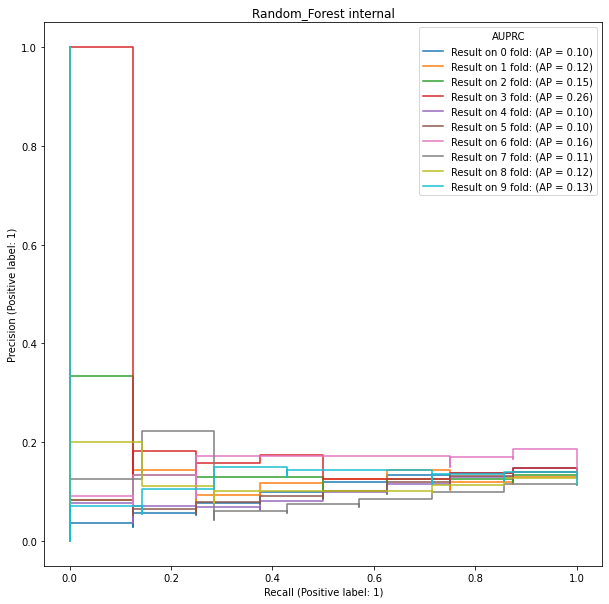

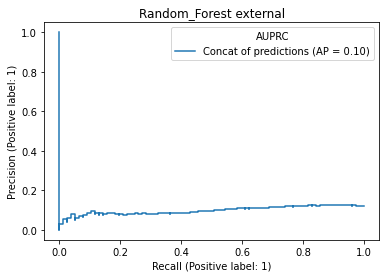

In [39]:
!mkdir 'Result/Many_Feature_Selection_notebook/cnv'
create_result_json(result_dict, feature_selection_list_cnv, cnv_file_name, dataset_list, label, datasets)

# Create proteins result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mne

Running training : 0it [00:00, ?it/s]
Running proteins training :   0%|                                                                                                                                                            | 0/5 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name Result/Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:02,  2.78s/it]

Running fold : 2it [00:05,  2.82s/it]

Running fold : 3it [00:08,  2.91s/it]

Running fold : 4it [00:12,  3.22s/it]

Running fold : 5it [00:14,  2.93s/it]

Running fold : 6it [00:17,  2.87s/it]

Running fold : 7it [00:20,  2.78s/it]

Running fold : 8it [00:22,  2.78s/it]

Running fold : 9it [00:25,  2.73s/it]

Running fold : 10it [00:28,  2.77s/it]

                                      
Running proteins training :  20%|█████████████████████████████▌                                                                                                                      | 1/5 [00:28<01:53, 28.46s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name Result/Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:08,  8.75s/it]

Running fold : 2it [00:15,  7.44s/it]

Running fold : 3it [00:22,  7.33s/it]

Running fold : 4it [00:29,  7.11s/it]

Running fold : 5it [00:35,  6.94s/it]

Running fold : 6it [00:42,  6.94s/it]

Running fold : 7it [00:49,  6.80s/it]

Running fold : 8it [00:56,  6.94s/it]

Running fold : 9it [01:03,  6.89s/it]

Running fold : 10it [01:09,  6.77s/it]

                                      
Running proteins training :  40%|███████████████████████████████████████████████████████████▏                                                                                        | 2/5 [01:38<02:38, 52.87s/it]

TECNICA DI FS check boruta
file name Result/Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [00:10, 10.47s/it]

execute boruta




Running fold : 2it [00:17,  8.35s/it]

execute boruta




Running fold : 3it [00:24,  7.93s/it]

execute boruta




Running fold : 4it [00:34,  8.71s/it]

execute boruta




Running fold : 5it [00:41,  7.90s/it]

execute boruta




Running fold : 6it [00:46,  7.21s/it]

execute boruta




Running fold : 7it [00:54,  7.18s/it]

execute boruta




Running fold : 8it [01:00,  6.97s/it]

execute boruta




Running fold : 9it [01:09,  7.67s/it]

execute boruta




Running fold : 10it [01:16,  7.44s/it]

                                      
Running proteins training :  60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 3/5 [02:55<02:07, 63.83s/it]

TECNICA DI FS check mine
file name Result/Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                                                                                                                                                                   | 0/216 [00:00<?, ?it/s]


Running MINE test:  19%|████████████████████████████▎                                                                                                                            | 40/216 [00:00<00:00, 394.61it/s]


Running MINE test:  37%|████████████████████████████████████████████████████████▋                                                                                                | 80/216 [00:00<00:00, 394.95it/s]


Running MINE test:  56%|████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 120/216 [00:00<00:00, 392.98it/s]


Running MINE test:  74%|██████████████████████████████████████████████████████████████████████████████████

Running proteins training :  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 4/5 [05:16<01:34, 94.22s/it]

TECNICA DI FS check mrmr
file name Result/Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 136 	 PKC-alpha_pS657 	 0.000
2 	 135 	 PKC-alpha 	 0.000
3 	 139 	 PR 	 0.000
4 	 138 	 PKC-pan_BetaII_pS660 	 0.000
5 	 137 	 PKC-delta_pS664 	 0.000
6 	 142 	 PREX1 	 0.000
7 	 144 	 Paxillin 	 0.000
8 	 134 	 PI3K-p85 	 0.000
9 	 133 	 PI3K-p110-alpha 	 0.000
10 	 132 	 PEA15_pS116 	 0.000
11 	 141 	 PRDX1 	 0.000
12 	 130 	 PDK1_pS241 	 0.000
13 	 143 	 PTEN 	 0.000
14 	 150 	 Raptor 	 0.000
15 	 149 	 Rad51 	 0.000
16 	 153 	 Rictor 	 0.000
17 	 152 	 Rb_pS807_S811 	 0.0



Running fold : 1it [14:45, 885.95s/it]

.043
32 	 117 	 Myosin-IIa_pS1943 	 0.043
33 	 123 	 Notch1 	 0.043
34 	 127 	 PCNA 	 0.043
35 	 126 	 PARP_cleaved 	 0.043
36 	 125 	 PAI-1 	 0.043
37 	 128 	 PDCD4 	 0.043
38 	 122 	 NF2 	 0.043
39 	 121 	 NF-kB-p65_pS536 	 0.043
40 	 102 	 JAB1 	 0.043
41 	 157 	 S6_pS240_S244 	 0.043
42 	 198 	 eEF2K 	 0.043
43 	 197 	 eEF2 	 0.043
44 	 201 	 mTOR 	 0.043
45 	 200 	 eIF4G 	 0.043
46 	 203 	 p16_INK4a 	 0.043
47 	 205 	 p27 	 0.043
48 	 196 	 cIAP 	 0.043
49 	 202 	 mTOR_pS2448 	 0.043
50 	 192 	 c-Kit 	 0.043
51 	 204 	 p21 	 0.043
52 	 211 	 p62-LCK-ligand 	 0.043
53 	 210 	 p53 	 0.043
54 	 214 	 p90RSK 	 0.043
55 	 213 	 p70S6K_pT389 	 0.043
56 	 212 	 p70S6K 	 0.043
57 	 190 	 c-Abl 	 0.043
58 	 166 	 Smad1 	 0.043
59 	 165 	 Smac 	 0.043
60 	 174 	 Syk 	 0.043
61 	 163 	 STAT5-alpha 	 0.043
62 	 159 	 SETD2 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 187 	 YB-1 	 0.043
65 	 178 	 TSC1 	 0.043
66 	 177 	 TIGAR 	 0.043
67 	 103 	 JNK2 	 0.043
68 	 36 	 Bcl2A1 	 0.043
69 	 4



Running fold : 2it [29:28, 884.06s/it]

OR_pS2448 	 0.000
66 	 190 	 c-Abl 	 0.000
67 	 211 	 p62-LCK-ligand 	 0.000
68 	 209 	 p38_pT180_Y182 	 0.000
69 	 214 	 p90RSK 	 0.000
70 	 213 	 p70S6K_pT389 	 0.000
71 	 212 	 p70S6K 	 0.000
72 	 189 	 beta-Catenin 	 0.000
73 	 210 	 p53 	 0.000
74 	 205 	 p27 	 0.000
75 	 208 	 p38_MAPK 	 0.000
76 	 207 	 p27_pT198 	 0.000
77 	 206 	 p27_pT157 	 0.000
78 	 191 	 c-Jun_pS73 	 0.000
79 	 108 	 Lck 	 0.000
80 	 170 	 Src 	 0.000
81 	 168 	 Smad4 	 0.000
82 	 173 	 Stathmin 	 0.000
83 	 172 	 Src_pY527 	 0.000
84 	 171 	 Src_pY416 	 0.000
85 	 175 	 TAZ 	 0.000
86 	 169 	 Snail 	 0.000
87 	 177 	 TIGAR 	 0.000
88 	 167 	 Smad3 	 0.000
89 	 166 	 Smad1 	 0.000
90 	 165 	 Smac 	 0.000
91 	 174 	 Syk 	 0.000
92 	 164 	 Shc_pY317 	 0.000
93 	 184 	 XRCC1 	 0.000
94 	 182 	 VEGFR2 	 0.000
95 	 187 	 YB-1 	 0.000
96 	 186 	 YAP_pS127 	 0.000
97 	 185 	 YAP 	 0.000
98 	 188 	 YB-1_pS102 	 0.000
99 	 183 	 XBP1 	 0.000
100 	 178 	 TSC1 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Scor



Running fold : 3it [44:15, 885.40s/it]

B-1 	 0.043
45 	 198 	 eEF2K 	 0.043
46 	 210 	 p53 	 0.043
47 	 214 	 p90RSK 	 0.043
48 	 213 	 p70S6K_pT389 	 0.043
49 	 212 	 p70S6K 	 0.043
50 	 201 	 mTOR 	 0.043
51 	 205 	 p27 	 0.043
52 	 203 	 p16_INK4a 	 0.043
53 	 184 	 XRCC1 	 0.043
54 	 165 	 Smac 	 0.043
55 	 163 	 STAT5-alpha 	 0.043
56 	 170 	 Src 	 0.043
57 	 159 	 SETD2 	 0.043
58 	 158 	 SCD 	 0.043
59 	 157 	 S6_pS240_S244 	 0.043
60 	 166 	 Smad1 	 0.043
61 	 156 	 S6_pS235_S236 	 0.043
62 	 177 	 TIGAR 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 178 	 TSC1 	 0.043
65 	 181 	 Tuberin_pT1462 	 0.043
66 	 174 	 Syk 	 0.043
67 	 101 	 IRS1 	 0.043
68 	 99 	 INPP4B 	 0.043
69 	 32 	 Bap1-c-4 	 0.043
70 	 39 	 Bim 	 0.043
71 	 28 	 BRCA2 	 0.043
72 	 36 	 Bcl2A1 	 0.043
73 	 26 	 B-Raf 	 0.043
74 	 40 	 C-Raf 	 0.043
75 	 48 	 COG3 	 0.043
76 	 45 	 CD49b 	 0.043
77 	 49 	 Caspase-3 	 0.043
78 	 46 	 CDK1 	 0.043
79 	 43 	 CD26 	 0.043
80 	 27 	 B-Raf_pS445 	 0.043
81 	 9 	 A-Raf_pS299 	 0.043
82 	 12 	 ACVRL1 	 0.



Running fold : 4it [58:59, 884.84s/it]

 p27_pT198 	 0.000
77 	 206 	 p27_pT157 	 0.000
78 	 192 	 c-Kit 	 0.000
79 	 108 	 Lck 	 0.000
80 	 172 	 Src_pY527 	 0.000
81 	 170 	 Src 	 0.000
82 	 175 	 TAZ 	 0.000
83 	 174 	 Syk 	 0.000
84 	 173 	 Stathmin 	 0.000
85 	 177 	 TIGAR 	 0.000
86 	 171 	 Src_pY416 	 0.000
87 	 178 	 TSC1 	 0.000
88 	 169 	 Snail 	 0.000
89 	 168 	 Smad4 	 0.000
90 	 167 	 Smad3 	 0.000
91 	 176 	 TFRC 	 0.000
92 	 166 	 Smad1 	 0.000
93 	 185 	 YAP 	 0.000
94 	 183 	 XBP1 	 0.000
95 	 188 	 YB-1_pS102 	 0.000
96 	 187 	 YB-1 	 0.000
97 	 186 	 YAP_pS127 	 0.000
98 	 189 	 beta-Catenin 	 0.000
99 	 184 	 XRCC1 	 0.000
100 	 179 	 Transglutaminase 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 142 	 PREX1 	 0.000
2 	 140 	 PRAS40_pT246 	 0.043
3 	 145 	 RBM15 	 0.043
4 	 144 	 Paxillin 	 0.043
5 	 143 	 PTEN 	 0.043
6 	 148 	 Rad50 	 0.043
7 	 141 	 PRDX1 	 0.043
8 	 149 	 Rad51 	 0.043
9 	 139 	 PR 	 0.043
10 	 138 	 PKC-pan_BetaII_pS660 	 0.043
11 	 137 	 PKC-delta_pS664 	 0.043
12 	



Running fold : 5it [1:13:43, 884.49s/it]

5 	 197 	 eEF2 	 0.000
56 	 195 	 c-Myc 	 0.000
57 	 200 	 eIF4G 	 0.000
58 	 199 	 eIF4E 	 0.000
59 	 198 	 eEF2K 	 0.000
60 	 202 	 mTOR_pS2448 	 0.000
61 	 196 	 cIAP 	 0.000
62 	 204 	 p21 	 0.000
63 	 194 	 c-Met_pY1235 	 0.000
64 	 193 	 c-Met 	 0.000
65 	 192 	 c-Kit 	 0.000
66 	 201 	 mTOR 	 0.000
67 	 190 	 c-Abl 	 0.000
68 	 203 	 p16_INK4a 	 0.000
69 	 211 	 p62-LCK-ligand 	 0.000
70 	 209 	 p38_pT180_Y182 	 0.000
71 	 214 	 p90RSK 	 0.000
72 	 213 	 p70S6K_pT389 	 0.000
73 	 212 	 p70S6K 	 0.000
74 	 189 	 beta-Catenin 	 0.000
75 	 210 	 p53 	 0.000
76 	 205 	 p27 	 0.000
77 	 208 	 p38_MAPK 	 0.000
78 	 207 	 p27_pT198 	 0.000
79 	 206 	 p27_pT157 	 0.000
80 	 191 	 c-Jun_pS73 	 0.000
81 	 108 	 Lck 	 0.000
82 	 170 	 Src 	 0.000
83 	 168 	 Smad4 	 0.000
84 	 173 	 Stathmin 	 0.000
85 	 172 	 Src_pY527 	 0.000
86 	 171 	 Src_pY416 	 0.000
87 	 175 	 TAZ 	 0.000
88 	 169 	 Snail 	 0.000
89 	 177 	 TIGAR 	 0.000
90 	 167 	 Smad3 	 0.000
91 	 166 	 Smad1 	 0.000
92 	 165 	 Sm



Running fold : 6it [1:28:26, 883.95s/it]

	 0.000
88 	 175 	 TAZ 	 0.000
89 	 182 	 VEGFR2 	 0.000
90 	 181 	 Tuberin_pT1462 	 0.000
91 	 185 	 YAP 	 0.000
92 	 184 	 XRCC1 	 0.000
93 	 183 	 XBP1 	 0.000
94 	 186 	 YAP_pS127 	 0.000
95 	 177 	 TIGAR 	 0.000
96 	 180 	 Tuberin 	 0.000
97 	 179 	 Transglutaminase 	 0.000
98 	 178 	 TSC1 	 0.000
99 	 103 	 JNK2 	 0.000
100 	 1 	 14-3-3_epsilon 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 141 	 PRDX1 	 0.000
2 	 140 	 PRAS40_pT246 	 0.043
3 	 145 	 RBM15 	 0.043
4 	 143 	 PTEN 	 0.043
5 	 142 	 PREX1 	 0.043
6 	 147 	 Rab25 	 0.043
7 	 149 	 Rad51 	 0.043
8 	 139 	 PR 	 0.043
9 	 138 	 PKC-pan_BetaII_pS660 	 0.043
10 	 137 	 PKC-delta_pS664 	 0.043
11 	 146 	 Rab11 	 0.043
12 	 135 	 PKC-alpha 	 0.043
13 	 148 	 Rad50 	 0.043
14 	 155 	 S6 	 0.043
15 	 154 	 Rictor_pT1135 	 0.043
16 	 158 	 SCD 	 0.043
17 	 157 	 S6_pS240_S244 	 0.043
18 	 156 	 S6_pS235_S236 	 0.043
19 	 133 	 PI3K-p110-alpha 	 0.043
20 	 150 	 Raptor 	 0.043
21 	 153 	 Rictor 	 0.043
22 	 152 



Running fold : 7it [1:43:09, 883.82s/it]

 	 103 	 JNK2 	 0.043
69 	 35 	 Bcl-xL 	 0.043
70 	 39 	 Bim 	 0.043
71 	 43 	 CD26 	 0.043
72 	 36 	 Bcl2A1 	 0.043
73 	 28 	 BRCA2 	 0.043
74 	 49 	 Caspase-3 	 0.043
75 	 101 	 IRS1 	 0.043
76 	 27 	 B-Raf_pS445 	 0.043
77 	 45 	 CD49b 	 0.043
78 	 48 	 COG3 	 0.043
79 	 47 	 CDK1_pY15 	 0.043
80 	 46 	 CDK1 	 0.043
81 	 11 	 ACC_pS79 	 0.043
82 	 9 	 A-Raf_pS299 	 0.043
83 	 14 	 AMPK_alpha 	 0.043
84 	 3 	 4E-BP1 	 0.043
85 	 12 	 ACVRL1 	 0.043
86 	 22 	 Akt_pS473 	 0.043
87 	 26 	 B-Raf 	 0.043
88 	 21 	 Akt 	 0.043
89 	 15 	 AMPK_pT172 	 0.043
90 	 16 	 AR 	 0.043
91 	 55 	 Chk1_pS345 	 0.043
92 	 81 	 FOXO3a_pS318_S321 	 0.043
93 	 85 	 GAB2 	 0.043
94 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
95 	 80 	 FOXO3a 	 0.043
96 	 79 	 FASN 	 0.043
97 	 78 	 ETS-1 	 0.043
98 	 100 	 IRF-1 	 0.043
99 	 99 	 INPP4B 	 0.043
100 	 98 	 IGFBP2 	 0.043


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.pe



Running fold : 8it [1:57:54, 884.07s/it]

0.000
100 	 174 	 Syk 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 137 	 PKC-delta_pS664 	 0.000
2 	 136 	 PKC-alpha_pS657 	 0.043
3 	 140 	 PRAS40_pT246 	 0.043
4 	 139 	 PR 	 0.043
5 	 143 	 PTEN 	 0.043
6 	 145 	 RBM15 	 0.043
7 	 135 	 PKC-alpha 	 0.043
8 	 134 	 PI3K-p85 	 0.043
9 	 133 	 PI3K-p110-alpha 	 0.043
10 	 142 	 PREX1 	 0.043
11 	 131 	 PEA15 	 0.043
12 	 144 	 Paxillin 	 0.043
13 	 151 	 Rb 	 0.043
14 	 150 	 Raptor 	 0.043
15 	 154 	 Rictor_pT1135 	 0.043
16 	 153 	 Rictor 	 0.043
17 	 152 	 Rb_pS807_S811 	 0.043
18 	 149 	 Rad51 	 0.043
19 	 148 	 Rad50 	 0.043
20 	 147 	 Rab25 	 0.043
21 	 132 	 PEA15_pS116 	 0.043
22 	 156 	 S6_pS235_S236 	 0.043
23 	 130 	 PDK1_pS241 	 0.043
24 	 109 	 MAPK_pT202_Y204 	 0.043
25 	 113 	 MSH2 	 0.043
26 	 112 	 MIG-6 	 0.043
27 	 117 	 Myosin-IIa_pS1943 	 0.043
28 	 2 	 14-3-3_zeta 	 0.043
29 	 107 	 LKB1 	 0.043
30 	 106 	 Ku80 	 0.043
31 	 114 	 MSH6 	 0.043
32 	 158 	 SCD 	 0.043
33 	 116 	 Mre11 	 0.043
34 	 1



Running fold : 9it [2:12:40, 884.62s/it]

3
80 	 15 	 AMPK_pT172 	 0.043
81 	 16 	 AR 	 0.043
82 	 3 	 4E-BP1 	 0.043
83 	 14 	 AMPK_alpha 	 0.043
84 	 23 	 Akt_pT308 	 0.043
85 	 21 	 Akt 	 0.043
86 	 27 	 B-Raf_pS445 	 0.043
87 	 26 	 B-Raf 	 0.043
88 	 28 	 BRCA2 	 0.043
89 	 55 	 Chk1_pS345 	 0.043
90 	 100 	 IRF-1 	 0.043
91 	 92 	 HER2_pY1248 	 0.043
92 	 78 	 ETS-1 	 0.043
93 	 74 	 ER-alpha_pS118 	 0.043
94 	 73 	 ER-alpha 	 0.043
95 	 79 	 FASN 	 0.043
96 	 71 	 EGFR_pY1173 	 0.043
97 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
98 	 80 	 FOXO3a 	 0.043
99 	 72 	 EPPK1 	 0.043
100 	 85 	 GAB2 	 0.043


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 



Running fold : 10it [2:27:28, 885.78s/it]

                                         
Running proteins training : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [2:32:44<00:00, 3251.22s/it]


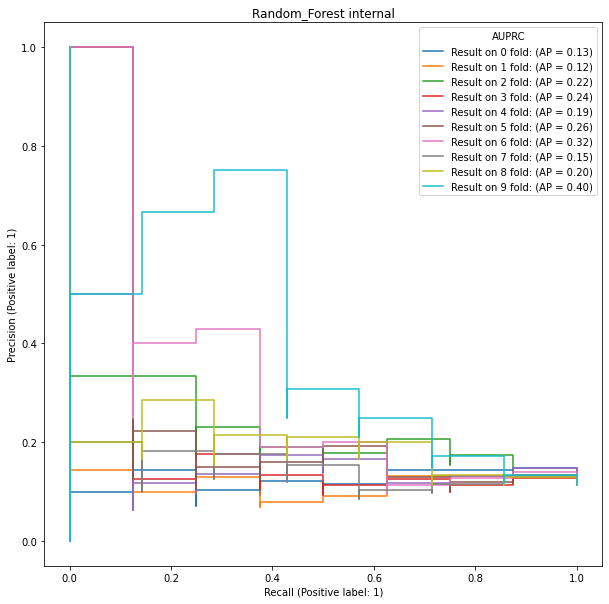

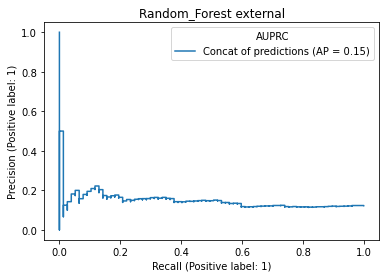

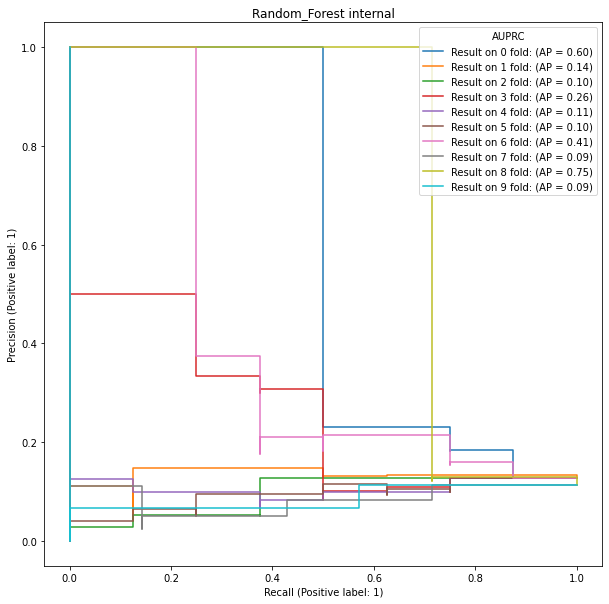

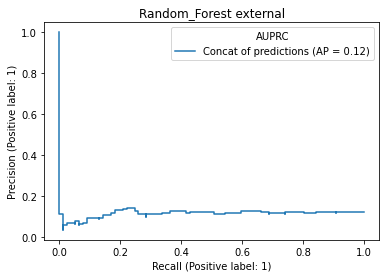

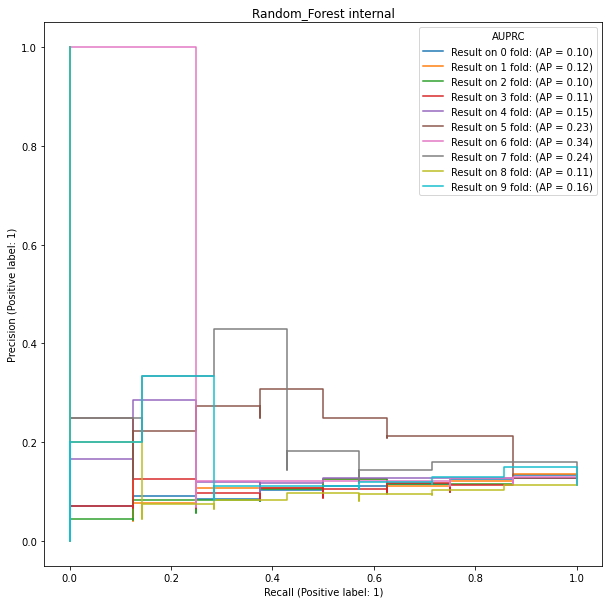

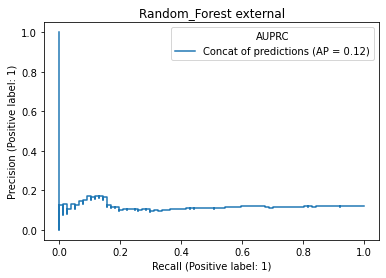

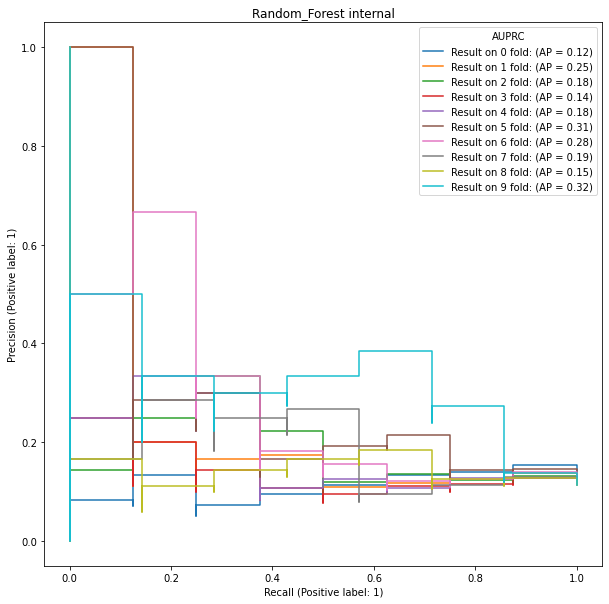

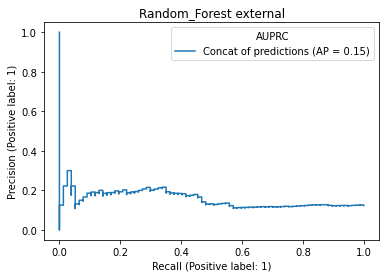

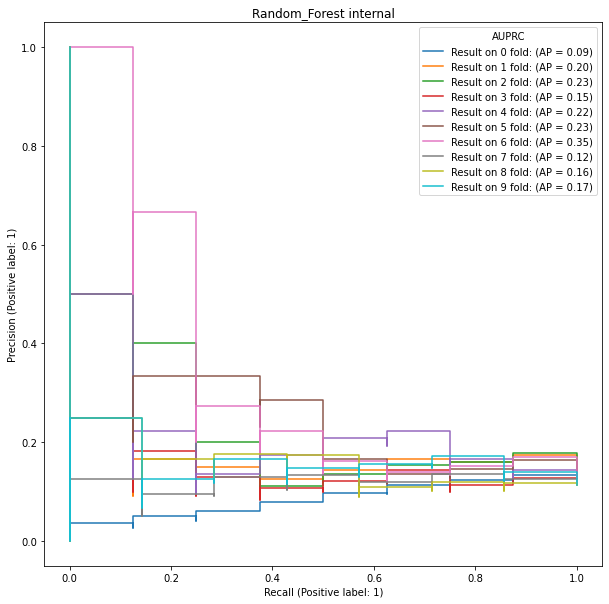

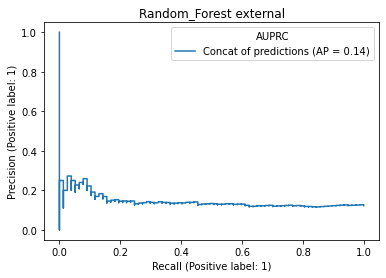

In [40]:
dataset_list = ['proteins']
proteins_file_name = ['Result/Many_Feature_Selection_notebook/proteins/proteins.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine', 'mrmr']


!mkdir 'Result/Many_Feature_Selection_notebook/proteins'
create_result_json(result_dict, feature_selection_list, proteins_file_name, dataset_list, label, datasets)

# Create mRNA result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mine, boruta

Running training : 0it [00:00, ?it/s]
Running mrna training :   0%|                                                                                                                                                                | 0/4 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name Result/Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [02:09, 129.39s/it]

Running fold : 2it [04:28, 134.83s/it]

Running fold : 3it [06:09, 119.63s/it]

Running fold : 4it [08:20, 123.91s/it]

Running fold : 5it [09:19, 100.55s/it]

Running fold : 6it [10:44, 95.35s/it] 

Running fold : 7it [12:19, 95.32s/it]

Running fold : 8it [14:18, 102.81s/it]

Running fold : 9it [15:41, 96.46s/it] 

Running fold : 10it [16:36, 83.66s/it]

                                      
Running mrna training :  25%|█████████████████████████████████████▊                                                                                                                 | 1/4 [16:36<49:48, 996.15s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name Result/Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:08,  9.00s/it]

Running fold : 2it [00:17,  8.97s/it]

Running fold : 3it [00:26,  8.60s/it]

Running fold : 4it [00:35,  8.74s/it]

Running fold : 5it [00:43,  8.80s/it]

Running fold : 6it [00:53,  8.96s/it]

Running fold : 7it [01:02,  8.91s/it]

Running fold : 8it [01:10,  8.90s/it]

Running fold : 9it [01:20,  9.02s/it]

Running fold : 10it [01:29,  8.99s/it]

                                      
Running mrna training :  50%|███████████████████████████████████████████████████████████████████████████▌                                                                           | 2/4 [18:05<15:25, 462.68s/it]

TECNICA DI FS check boruta
file name Result/Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [00:43, 43.12s/it]

execute boruta




Running fold : 2it [01:28, 44.34s/it]

execute boruta




Running fold : 3it [02:13, 44.60s/it]

execute boruta




Running fold : 4it [02:57, 44.60s/it]

execute boruta




Running fold : 5it [03:41, 44.39s/it]

execute boruta




Running fold : 6it [04:25, 44.29s/it]

execute boruta




Running fold : 7it [05:10, 44.25s/it]

execute boruta




Running fold : 8it [05:53, 43.98s/it]

execute boruta




Running fold : 9it [06:37, 43.96s/it]

execute boruta




Running fold : 10it [07:21, 44.02s/it]

                                      
Running mrna training :  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 3/4 [25:27<07:33, 453.09s/it]

TECNICA DI FS check mine
file name Result/Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                                                                                                                                                                 | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|▍                                                                                                                                                      | 47/18465 [00:00<00:39, 461.30it/s]


Running MINE test:   1%|▊                                                                                                                                                      | 94/18465 [00:00<00:40, 449.78it/s]


Running MINE test:   1%|█▏                                                                                                                                                    | 141/18465 [00:00<00:40, 453.76it/s]


Running MINE test:   1%|█▌                                                                                

Running MINE test:  19%|████████████████████████████▉                                                                                                                        | 3584/18465 [00:07<00:31, 475.16it/s]


Running MINE test:  20%|█████████████████████████████▎                                                                                                                       | 3633/18465 [00:07<00:31, 476.19it/s]


Running MINE test:  20%|█████████████████████████████▋                                                                                                                       | 3681/18465 [00:07<00:31, 466.91it/s]


Running MINE test:  20%|██████████████████████████████                                                                                                                       | 3729/18465 [00:07<00:31, 468.71it/s]


Running MINE test:  20%|██████████████████████████████▍                                                                                         

Running MINE test:  39%|██████████████████████████████████████████████████████████▍                                                                                          | 7240/18465 [00:15<00:22, 510.17it/s]


Running MINE test:  39%|██████████████████████████████████████████████████████████▊                                                                                          | 7292/18465 [00:15<00:22, 497.25it/s]


Running MINE test:  40%|███████████████████████████████████████████████████████████▎                                                                                         | 7345/18465 [00:15<00:22, 503.98it/s]


Running MINE test:  40%|███████████████████████████████████████████████████████████▋                                                                                         | 7396/18465 [00:15<00:22, 500.20it/s]


Running MINE test:  40%|████████████████████████████████████████████████████████████                                                            

Running MINE test:  60%|████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 11057/18465 [00:23<00:16, 455.23it/s]


Running MINE test:  60%|████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 11103/18465 [00:23<00:16, 441.50it/s]


Running MINE test:  60%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 11156/18465 [00:23<00:15, 466.02it/s]


Running MINE test:  61%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 11269/18465 [00:23<00:10, 655.93it/s]


Running MINE test:  62%|███████████████████████████████████████████████████████████████████████████████████████████▍                            

Running MINE test:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 14948/18465 [00:31<00:07, 494.39it/s]


Running MINE test:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 14998/18465 [00:31<00:07, 473.05it/s]


Running MINE test:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 15076/18465 [00:31<00:06, 559.94it/s]


Running MINE test:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 15147/18465 [00:31<00:05, 601.41it/s]


Running MINE test:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 18463/18465 [00:38<00:00, 430.65it/s]


                                                                                                                                                                                                                   

Running fold : 1it [13:55, 835.02s/it]


Running MINE test:   0%|                                                                                                                                                                 | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|▍                                                                                                                                                      | 49/18465 [00:00<00:38, 480.94it/s]


Running MINE test:   1%|▊                                                                               

Running MINE test:  19%|████████████████████████████                                                                                                                         | 3471/18465 [00:07<00:35, 419.54it/s]


Running MINE test:  19%|████████████████████████████▍                                                                                                                        | 3523/18465 [00:07<00:33, 445.27it/s]


Running MINE test:  19%|████████████████████████████▊                                                                                                                        | 3576/18465 [00:07<00:31, 466.88it/s]


Running MINE test:  20%|█████████████████████████████▎                                                                                                                       | 3625/18465 [00:07<00:31, 470.27it/s]


Running MINE test:  20%|█████████████████████████████▋                                                                                          

Running MINE test:  39%|█████████████████████████████████████████████████████████▍                                                                                           | 7119/18465 [00:15<00:22, 501.23it/s]


Running MINE test:  39%|█████████████████████████████████████████████████████████▉                                                                                           | 7185/18465 [00:15<00:20, 544.44it/s]


Running MINE test:  39%|██████████████████████████████████████████████████████████▍                                                                                          | 7240/18465 [00:15<00:21, 512.01it/s]


Running MINE test:  39%|██████████████████████████████████████████████████████████▊                                                                                          | 7292/18465 [00:15<00:22, 498.51it/s]


Running MINE test:  40%|███████████████████████████████████████████████████████████▎                                                            

Running MINE test:  59%|███████████████████████████████████████████████████████████████████████████████████████▊                                                            | 10954/18465 [00:22<00:15, 485.08it/s]


Running MINE test:  60%|████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 11003/18465 [00:22<00:15, 473.43it/s]


Running MINE test:  60%|████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 11051/18465 [00:23<00:16, 461.23it/s]


Running MINE test:  60%|████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 11098/18465 [00:23<00:16, 444.92it/s]


Running MINE test:  60%|█████████████████████████████████████████████████████████████████████████████████████████▎                              

Running MINE test:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 14864/18465 [00:30<00:07, 482.38it/s]


Running MINE test:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 14922/18465 [00:31<00:06, 508.29it/s]


Running MINE test:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 14973/18465 [00:31<00:07, 476.71it/s]


Running MINE test:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 15022/18465 [00:31<00:07, 471.25it/s]


Running MINE test:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 18410/18465 [00:38<00:00, 420.33it/s]


Running MINE test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 18457/18465 [00:38<00:00, 434.10it/s]


                                                                                                                                                                                                                   

Running fold : 2it [27:28, 822.21s/it]


Running MINE test:   0%|                                                                                                                                                                 | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|▍                                                                               

Running MINE test:  18%|███████████████████████████▌                                                                                                                         | 3413/18465 [00:07<00:33, 452.93it/s]


Running MINE test:  19%|███████████████████████████▉                                                                                                                         | 3459/18465 [00:07<00:33, 442.46it/s]


Running MINE test:  19%|████████████████████████████▎                                                                                                                        | 3507/18465 [00:07<00:33, 449.99it/s]


Running MINE test:  19%|████████████████████████████▋                                                                                                                        | 3560/18465 [00:07<00:31, 470.34it/s]


Running MINE test:  20%|█████████████████████████████                                                                                           

Running MINE test:  38%|████████████████████████████████████████████████████████▌                                                                                            | 7008/18465 [00:14<00:26, 428.55it/s]


Running MINE test:  38%|████████████████████████████████████████████████████████▉                                                                                            | 7053/18465 [00:14<00:26, 429.53it/s]


Running MINE test:  38%|█████████████████████████████████████████████████████████▎                                                                                           | 7105/18465 [00:15<00:25, 453.55it/s]


Running MINE test:  39%|█████████████████████████████████████████████████████████▉                                                                                           | 7177/18465 [00:15<00:21, 525.48it/s]


Running MINE test:  39%|██████████████████████████████████████████████████████████▎                                                             

Running MINE test:  59%|██████████████████████████████████████████████████████████████████████████████████████▊                                                             | 10824/18465 [00:22<00:15, 481.06it/s]


Running MINE test:  59%|███████████████████████████████████████████████████████████████████████████████████████▏                                                            | 10873/18465 [00:22<00:15, 479.56it/s]


Running MINE test:  59%|███████████████████████████████████████████████████████████████████████████████████████▌                                                            | 10922/18465 [00:22<00:15, 474.18it/s]


Running MINE test:  59%|███████████████████████████████████████████████████████████████████████████████████████▉                                                            | 10973/18465 [00:22<00:15, 481.42it/s]


Running MINE test:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                               

Running MINE test:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 14689/18465 [00:30<00:07, 485.95it/s]


Running MINE test:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 14738/18465 [00:30<00:07, 482.36it/s]


Running MINE test:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 14787/18465 [00:30<00:07, 478.26it/s]


Running MINE test:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 14835/18465 [00:30<00:07, 462.80it/s]


Running MINE test:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎

Running MINE test:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 18218/18465 [00:38<00:00, 410.13it/s]


Running MINE test:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 18260/18465 [00:38<00:00, 404.58it/s]


Running MINE test:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 18303/18465 [00:38<00:00, 411.38it/s]


Running MINE test:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 18345/18465 [00:38<00:00, 412.07it/s]


Running MINE test: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  18%|██████████████████████████▏                                                                                                                          | 3242/18465 [00:06<00:32, 465.83it/s]


Running MINE test:  18%|██████████████████████████▌                                                                                                                          | 3291/18465 [00:06<00:32, 469.46it/s]


Running MINE test:  18%|██████████████████████████▉                                                                                                                          | 3340/18465 [00:07<00:31, 472.97it/s]


Running MINE test:  18%|███████████████████████████▎                                                                                                                         | 3388/18465 [00:07<00:33, 453.62it/s]


Running MINE test:  19%|███████████████████████████▋                                                                                            

Running MINE test:  37%|███████████████████████████████████████████████████████▍                                                                                             | 6872/18465 [00:14<00:23, 498.56it/s]


Running MINE test:  37%|███████████████████████████████████████████████████████▊                                                                                             | 6923/18465 [00:14<00:23, 489.99it/s]


Running MINE test:  38%|████████████████████████████████████████████████████████▎                                                                                            | 6975/18465 [00:14<00:23, 496.13it/s]


Running MINE test:  38%|████████████████████████████████████████████████████████▋                                                                                            | 7025/18465 [00:14<00:23, 477.52it/s]


Running MINE test:  38%|█████████████████████████████████████████████████████████                                                               

Running MINE test:  58%|█████████████████████████████████████████████████████████████████████████████████████▉                                                              | 10722/18465 [00:22<00:16, 456.18it/s]


Running MINE test:  58%|██████████████████████████████████████████████████████████████████████████████████████▎                                                             | 10768/18465 [00:22<00:17, 445.58it/s]


Running MINE test:  59%|██████████████████████████████████████████████████████████████████████████████████████▊                                                             | 10825/18465 [00:22<00:15, 479.92it/s]


Running MINE test:  59%|███████████████████████████████████████████████████████████████████████████████████████▏                                                            | 10874/18465 [00:22<00:15, 478.18it/s]


Running MINE test:  59%|███████████████████████████████████████████████████████████████████████████████████████▌                                

Running MINE test:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 14537/18465 [00:30<00:08, 441.66it/s]


Running MINE test:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 14584/18465 [00:30<00:08, 449.27it/s]


Running MINE test:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 14635/18465 [00:30<00:08, 466.89it/s]


Running MINE test:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 14687/18465 [00:30<00:07, 481.95it/s]


Running MINE test:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  

Running MINE test:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 18107/18465 [00:37<00:00, 406.99it/s]


Running MINE test:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 18149/18465 [00:38<00:00, 408.04it/s]


Running MINE test:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 18190/18465 [00:38<00:00, 408.02it/s]


Running MINE test:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 18231/18465 [00:38<00:00, 406.18it/s]


Running MINE test:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  17%|████████████████████████▊                                                                                                                            | 3076/18465 [00:06<00:33, 459.85it/s]


Running MINE test:  17%|█████████████████████████▏                                                                                                                           | 3123/18465 [00:06<00:34, 443.70it/s]


Running MINE test:  17%|█████████████████████████▌                                                                                                                           | 3170/18465 [00:06<00:33, 451.04it/s]


Running MINE test:  17%|█████████████████████████▉                                                                                                                           | 3216/18465 [00:06<00:34, 442.51it/s]


Running MINE test:  18%|██████████████████████████▍                                                                                             

Running MINE test:  36%|█████████████████████████████████████████████████████▌                                                                                               | 6639/18465 [00:14<00:24, 492.18it/s]


Running MINE test:  36%|██████████████████████████████████████████████████████                                                                                               | 6703/18465 [00:14<00:22, 532.48it/s]


Running MINE test:  37%|██████████████████████████████████████████████████████▌                                                                                              | 6757/18465 [00:14<00:23, 501.98it/s]


Running MINE test:  37%|██████████████████████████████████████████████████████▉                                                                                              | 6809/18465 [00:14<00:23, 506.44it/s]


Running MINE test:  37%|███████████████████████████████████████████████████████▎                                                                

Running MINE test:  57%|███████████████████████████████████████████████████████████████████████████████████▉                                                                | 10471/18465 [00:21<00:17, 455.45it/s]


Running MINE test:  57%|████████████████████████████████████████████████████████████████████████████████████▎                                                               | 10517/18465 [00:21<00:17, 452.86it/s]


Running MINE test:  57%|████████████████████████████████████████████████████████████████████████████████████▋                                                               | 10565/18465 [00:22<00:17, 459.95it/s]


Running MINE test:  58%|█████████████████████████████████████████████████████████████████████████████████████▏                                                              | 10622/18465 [00:22<00:16, 489.37it/s]


Running MINE test:  58%|█████████████████████████████████████████████████████████████████████████████████████▌                                  

Running MINE test:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 14341/18465 [00:29<00:09, 454.95it/s]


Running MINE test:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 14387/18465 [00:30<00:09, 438.47it/s]


Running MINE test:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 14433/18465 [00:30<00:09, 443.78it/s]


Running MINE test:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 14479/18465 [00:30<00:08, 448.16it/s]


Running MINE test:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   

Running MINE test:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 17921/18465 [00:37<00:01, 429.10it/s]


Running MINE test:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 17964/18465 [00:37<00:01, 421.56it/s]


Running MINE test:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 18007/18465 [00:37<00:01, 412.48it/s]


Running MINE test:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 18049/18465 [00:37<00:01, 411.42it/s]


Running MINE test:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  16%|███████████████████████▏                                                                                                                             | 2881/18465 [00:06<00:33, 468.88it/s]


Running MINE test:  16%|███████████████████████▋                                                                                                                             | 2929/18465 [00:06<00:33, 469.62it/s]


Running MINE test:  16%|████████████████████████                                                                                                                             | 2979/18465 [00:06<00:32, 475.16it/s]


Running MINE test:  16%|████████████████████████▍                                                                                                                            | 3027/18465 [00:06<00:33, 462.59it/s]


Running MINE test:  17%|████████████████████████▊                                                                                               

Running MINE test:  35%|███████████████████████████████████████████████████▉                                                                                                 | 6438/18465 [00:13<00:24, 494.11it/s]


Running MINE test:  35%|████████████████████████████████████████████████████▎                                                                                                | 6488/18465 [00:13<00:24, 480.80it/s]


Running MINE test:  35%|████████████████████████████████████████████████████▋                                                                                                | 6537/18465 [00:13<00:24, 481.77it/s]


Running MINE test:  36%|█████████████████████████████████████████████████████▏                                                                                               | 6587/18465 [00:13<00:24, 484.83it/s]


Running MINE test:  36%|█████████████████████████████████████████████████████▌                                                                  

Running MINE test:  56%|██████████████████████████████████████████████████████████████████████████████████▎                                                                 | 10275/18465 [00:21<00:21, 383.22it/s]


Running MINE test:  56%|██████████████████████████████████████████████████████████████████████████████████▋                                                                 | 10320/18465 [00:21<00:20, 399.08it/s]


Running MINE test:  56%|███████████████████████████████████████████████████████████████████████████████████▏                                                                | 10375/18465 [00:21<00:18, 440.01it/s]


Running MINE test:  56%|███████████████████████████████████████████████████████████████████████████████████▌                                                                | 10423/18465 [00:21<00:17, 450.17it/s]


Running MINE test:  57%|███████████████████████████████████████████████████████████████████████████████████▉                                    

Running MINE test:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 14157/18465 [00:29<00:08, 488.62it/s]


Running MINE test:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 14206/18465 [00:29<00:09, 467.77it/s]


Running MINE test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 14254/18465 [00:29<00:09, 446.24it/s]


Running MINE test:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 14299/18465 [00:29<00:09, 436.58it/s]


Running MINE test:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████     

Running MINE test:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 17752/18465 [00:37<00:01, 438.13it/s]


Running MINE test:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 17796/18465 [00:37<00:01, 436.48it/s]


Running MINE test:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 17840/18465 [00:37<00:01, 427.11it/s]


Running MINE test:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 17888/18465 [00:37<00:01, 440.86it/s]


Running MINE test:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  15%|█████████████████████▊                                                                                                                               | 2701/18465 [00:05<00:31, 498.01it/s]


Running MINE test:  15%|██████████████████████▏                                                                                                                              | 2751/18465 [00:05<00:32, 486.82it/s]


Running MINE test:  15%|██████████████████████▌                                                                                                                              | 2800/18465 [00:05<00:33, 463.39it/s]


Running MINE test:  15%|██████████████████████▉                                                                                                                              | 2850/18465 [00:06<00:33, 471.82it/s]


Running MINE test:  16%|███████████████████████▍                                                                                                

Running MINE test:  34%|██████████████████████████████████████████████████▋                                                                                                  | 6277/18465 [00:13<00:24, 501.20it/s]


Running MINE test:  34%|███████████████████████████████████████████████████                                                                                                  | 6330/18465 [00:13<00:23, 508.99it/s]


Running MINE test:  35%|███████████████████████████████████████████████████▍                                                                                                 | 6382/18465 [00:13<00:24, 495.17it/s]


Running MINE test:  35%|███████████████████████████████████████████████████▉                                                                                                 | 6432/18465 [00:13<00:24, 489.58it/s]


Running MINE test:  35%|████████████████████████████████████████████████████▎                                                                   

Running MINE test:  55%|█████████████████████████████████████████████████████████████████████████████████▎                                                                  | 10139/18465 [00:21<00:19, 427.60it/s]


Running MINE test:  55%|█████████████████████████████████████████████████████████████████████████████████▋                                                                  | 10184/18465 [00:21<00:19, 433.05it/s]


Running MINE test:  55%|██████████████████████████████████████████████████████████████████████████████████                                                                  | 10234/18465 [00:21<00:18, 450.61it/s]


Running MINE test:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                                 | 10280/18465 [00:21<00:18, 437.59it/s]


Running MINE test:  56%|██████████████████████████████████████████████████████████████████████████████████▊                                     

Running MINE test:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 13996/18465 [00:29<00:10, 445.27it/s]


Running MINE test:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 14041/18465 [00:29<00:10, 440.27it/s]


Running MINE test:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 14086/18465 [00:29<00:09, 439.61it/s]


Running MINE test:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 14148/18465 [00:29<00:08, 491.35it/s]


Running MINE test:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      

Running MINE test:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 17612/18465 [00:36<00:01, 468.82it/s]


Running MINE test:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 17660/18465 [00:36<00:01, 466.04it/s]


Running MINE test:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 17707/18465 [00:37<00:01, 452.45it/s]


Running MINE test:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 17753/18465 [00:37<00:01, 439.43it/s]


Running MINE test:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  14%|████████████████████▎                                                                                                                                | 2516/18465 [00:05<00:30, 523.26it/s]


Running MINE test:  14%|████████████████████▋                                                                                                                                | 2571/18465 [00:05<00:30, 528.73it/s]


Running MINE test:  14%|█████████████████████▏                                                                                                                               | 2624/18465 [00:05<00:30, 512.14it/s]


Running MINE test:  14%|█████████████████████▌                                                                                                                               | 2676/18465 [00:05<00:31, 506.46it/s]


Running MINE test:  15%|██████████████████████                                                                                                  

Running MINE test:  33%|████████████████████████████████████████████████▊                                                                                                    | 6052/18465 [00:12<00:25, 495.67it/s]


Running MINE test:  33%|█████████████████████████████████████████████████▎                                                                                                   | 6105/18465 [00:13<00:24, 503.36it/s]


Running MINE test:  33%|█████████████████████████████████████████████████▋                                                                                                   | 6156/18465 [00:13<00:25, 479.18it/s]


Running MINE test:  34%|██████████████████████████████████████████████████▏                                                                                                  | 6214/18465 [00:13<00:24, 504.88it/s]


Running MINE test:  34%|██████████████████████████████████████████████████▌                                                                     

Running MINE test:  54%|████████████████████████████████████████████████████████████████████████████████▏                                                                    | 9940/18465 [00:20<00:19, 434.63it/s]


Running MINE test:  54%|████████████████████████████████████████████████████████████████████████████████▌                                                                    | 9984/18465 [00:20<00:19, 431.31it/s]


Running MINE test:  54%|████████████████████████████████████████████████████████████████████████████████▍                                                                   | 10029/18465 [00:21<00:19, 434.66it/s]


Running MINE test:  55%|████████████████████████████████████████████████████████████████████████████████▋                                                                   | 10074/18465 [00:21<00:19, 437.05it/s]


Running MINE test:  55%|█████████████████████████████████████████████████████████████████████████████████                                       

Running MINE test:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 13805/18465 [00:28<00:10, 442.49it/s]


Running MINE test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 13850/18465 [00:29<00:10, 437.90it/s]


Running MINE test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 13894/18465 [00:29<00:10, 436.72it/s]


Running MINE test:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 13939/18465 [00:29<00:10, 437.95it/s]


Running MINE test:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████        

Running MINE test:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 17384/18465 [00:36<00:02, 461.18it/s]


Running MINE test:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 17431/18465 [00:36<00:02, 449.72it/s]


Running MINE test:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 17477/18465 [00:36<00:02, 451.07it/s]


Running MINE test:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 17523/18465 [00:36<00:02, 440.85it/s]


Running MINE test:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  12%|██████████████████                                                                                                                                   | 2235/18465 [00:04<00:31, 522.90it/s]


Running MINE test:  12%|██████████████████▍                                                                                                                                  | 2289/18465 [00:04<00:30, 524.90it/s]


Running MINE test:  13%|██████████████████▉                                                                                                                                  | 2342/18465 [00:05<00:30, 526.25it/s]


Running MINE test:  13%|███████████████████▎                                                                                                                                 | 2395/18465 [00:05<00:31, 513.41it/s]


Running MINE test:  13%|███████████████████▋                                                                                                    

Running MINE test:  31%|██████████████████████████████████████████████▍                                                                                                      | 5758/18465 [00:12<00:28, 453.04it/s]


Running MINE test:  31%|██████████████████████████████████████████████▊                                                                                                      | 5808/18465 [00:12<00:27, 464.33it/s]


Running MINE test:  32%|███████████████████████████████████████████████▎                                                                                                     | 5860/18465 [00:12<00:26, 478.36it/s]


Running MINE test:  32%|███████████████████████████████████████████████▋                                                                                                     | 5911/18465 [00:12<00:25, 485.44it/s]


Running MINE test:  32%|████████████████████████████████████████████████▏                                                                       

Running MINE test:  52%|█████████████████████████████████████████████████████████████████████████████▉                                                                       | 9658/18465 [00:20<00:19, 450.54it/s]


Running MINE test:  53%|██████████████████████████████████████████████████████████████████████████████▎                                                                      | 9706/18465 [00:20<00:19, 456.71it/s]


Running MINE test:  53%|██████████████████████████████████████████████████████████████████████████████▋                                                                      | 9752/18465 [00:20<00:19, 439.39it/s]


Running MINE test:  53%|███████████████████████████████████████████████████████████████████████████████                                                                      | 9797/18465 [00:20<00:19, 437.09it/s]


Running MINE test:  53%|███████████████████████████████████████████████████████████████████████████████▍                                        

Running MINE test:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 13473/18465 [00:28<00:11, 437.55it/s]


Running MINE test:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 13522/18465 [00:28<00:10, 452.52it/s]


Running MINE test:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 13568/18465 [00:28<00:10, 445.23it/s]


Running MINE test:  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 13619/18465 [00:28<00:10, 461.73it/s]


Running MINE test:  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          

Running MINE test:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 17052/18465 [00:36<00:03, 439.32it/s]


Running MINE test:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 17097/18465 [00:36<00:03, 429.83it/s]


Running MINE test:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 17142/18465 [00:36<00:03, 433.03it/s]


Running MINE test:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 17192/18465 [00:36<00:02, 450.62it/s]


Running MINE test:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Running MINE test:  10%|██████████████▉                                                                                                                                      | 1849/18465 [00:04<00:32, 503.65it/s]


Running MINE test:  10%|███████████████▎                                                                                                                                     | 1900/18465 [00:04<00:32, 502.57it/s]


Running MINE test:  11%|███████████████▋                                                                                                                                     | 1951/18465 [00:04<00:33, 490.37it/s]


Running MINE test:  11%|████████████████▏                                                                                                                                    | 2001/18465 [00:04<00:33, 493.15it/s]


Running MINE test:  11%|████████████████▌                                                                                                       

Running MINE test:  29%|███████████████████████████████████████████▍                                                                                                         | 5378/18465 [00:11<00:31, 420.60it/s]


Running MINE test:  29%|███████████████████████████████████████████▊                                                                                                         | 5429/18465 [00:11<00:29, 444.00it/s]


Running MINE test:  30%|████████████████████████████████████████████▏                                                                                                        | 5482/18465 [00:11<00:27, 465.81it/s]


Running MINE test:  30%|████████████████████████████████████████████▌                                                                                                        | 5529/18465 [00:11<00:27, 466.18it/s]


Running MINE test:  30%|█████████████████████████████████████████████                                                                           

Running MINE test:  50%|██████████████████████████████████████████████████████████████████████████▌                                                                          | 9243/18465 [00:19<00:16, 558.85it/s]


Running MINE test:  50%|███████████████████████████████████████████████████████████████████████████                                                                          | 9300/18465 [00:19<00:17, 529.50it/s]


Running MINE test:  51%|███████████████████████████████████████████████████████████████████████████▍                                                                         | 9354/18465 [00:19<00:18, 503.83it/s]


Running MINE test:  51%|███████████████████████████████████████████████████████████████████████████▉                                                                         | 9405/18465 [00:19<00:18, 486.18it/s]


Running MINE test:  51%|████████████████████████████████████████████████████████████████████████████▎                                           

Running MINE test:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 13171/18465 [00:27<00:12, 433.54it/s]


Running MINE test:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 13215/18465 [00:27<00:12, 433.04it/s]


Running MINE test:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 13259/18465 [00:27<00:12, 422.34it/s]


Running MINE test:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 13302/18465 [00:27<00:12, 422.57it/s]


Running MINE test:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉             

Running MINE test:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 16695/18465 [00:35<00:03, 443.63it/s]


Running MINE test:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 16743/18465 [00:35<00:03, 453.60it/s]


Running MINE test:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 16789/18465 [00:35<00:03, 454.75it/s]


Running MINE test:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 16839/18465 [00:35<00:03, 464.70it/s]


Running MINE test:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

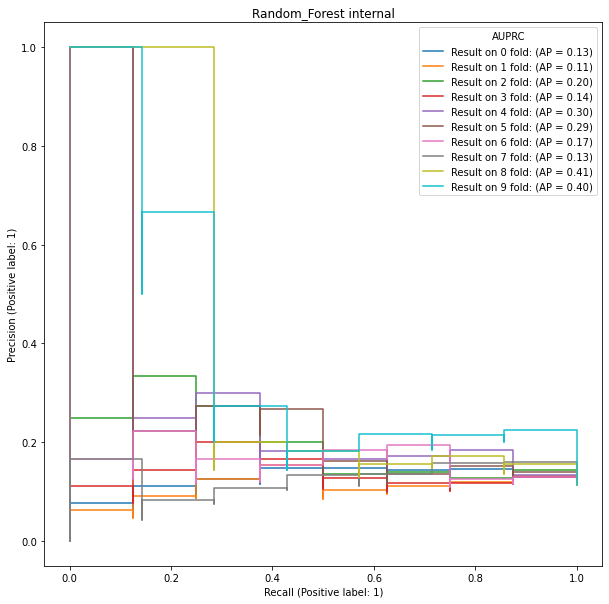

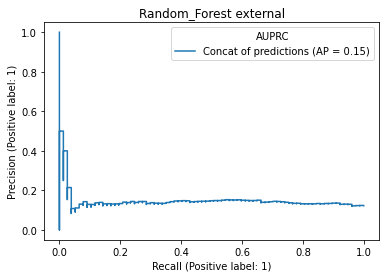

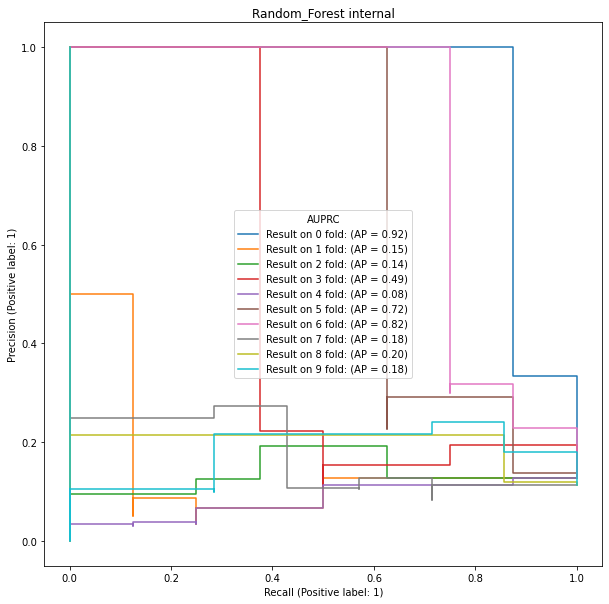

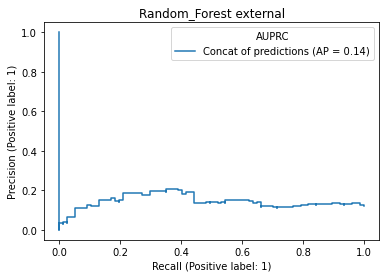

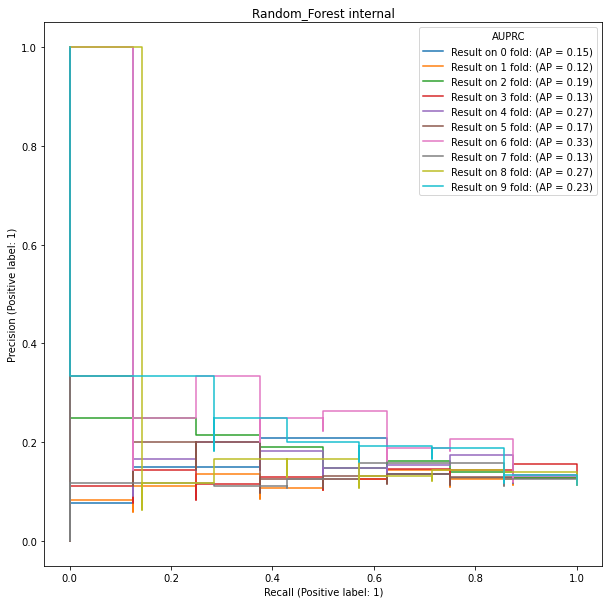

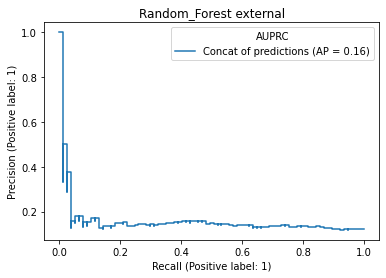

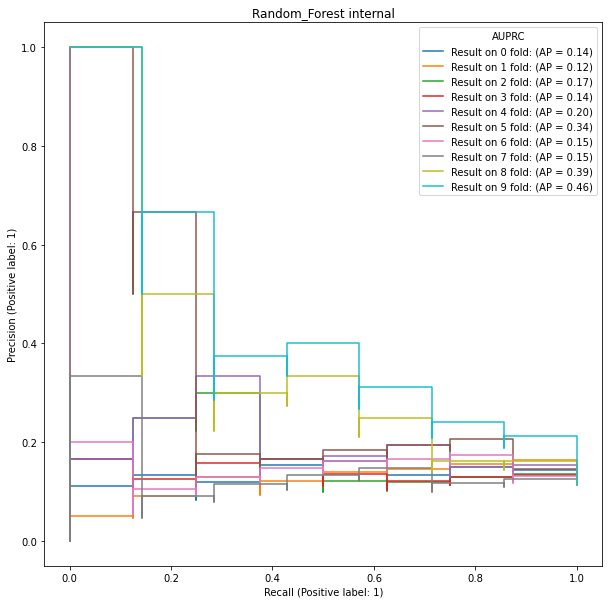

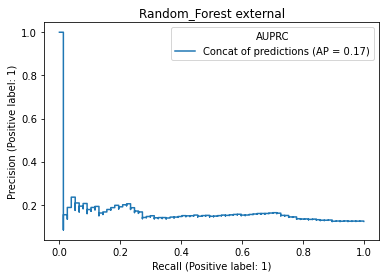

In [41]:
dataset_list = ['mrna']
mrna_file_name = ['Result/Many_Feature_Selection_notebook/mrna/mrna.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine']
#,'mrmr'

!mkdir 'Result/Many_Feature_Selection_notebook/mrna'
create_result_json(result_dict, feature_selection_list, mrna_file_name, dataset_list, label, datasets)

# Create miRNA result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

mkdir: impossibile creare la directory "Result/Many_Feature_Selection_notebook/mirna": File già esistente


Running training : 0it [00:00, ?it/s]
Running mirna training :   0%|                            | 0/5 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name Result/Many_Feature_Selection_notebook/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:04,  4.28s/it]

Running fold : 2it [00:11,  6.03s/it]

Running fold : 3it [00:19,  6.99s/it]

Running fold : 4it [00:25,  6.69s/it]

Running fold : 5it [00:30,  6.07s/it]

Running fold : 6it [00:36,  6.07s/it]

Running fold : 7it [00:41,  5.60s/it]

Running fold : 8it [00:47,  5.65s/it]

Running fold : 9it [00:52,  5.52s/it]

Running fold : 10it [00:58,  5.57s/it]

                                      
Running mirna training :  20%|████                | 1/5 [00:58<03:53, 58.39s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name Result/Many_Feature_Selection_notebook/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:09,  9.25s/it]

Running fold : 2it [00:16,  8.22s/it]

Running fold : 3it [00:23,  7.61s/it]

Running fold : 4it [00:30,  7.29s/it]

Running fold : 5it [00:37,  7.18s/it]

Running fold : 6it [00:43,  6.91s/it]

Running fold : 7it [00:51,  7.15s/it]

Running fold : 8it [00:58,  7.21s/it]

Running fold : 9it [01:06,  7.35s/it]

Running fold : 10it [01:13,  7.20s/it]

                                      
Running mirna training :  40%|████████            | 2/5 [02:11<03:21, 67.24s/it]

TECNICA DI FS check boruta
file name Result/Many_Feature_Selection_notebook/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [00:13, 13.19s/it]

execute boruta




Running fold : 2it [00:21, 10.59s/it]

execute boruta




Running fold : 3it [00:32, 10.40s/it]

execute boruta




Running fold : 4it [00:44, 11.32s/it]

execute boruta




Running fold : 5it [01:10, 16.58s/it]

execute boruta




Running fold : 6it [01:40, 20.91s/it]

execute boruta




Running fold : 7it [01:59, 20.28s/it]

execute boruta




Running fold : 8it [02:21, 21.10s/it]

execute boruta




Running fold : 9it [02:37, 19.29s/it]

execute boruta




Running fold : 10it [02:48, 16.70s/it]

                                      
Running mirna training :  60%|███████████▍       | 3/5 [05:00<03:46, 113.36s/it]

TECNICA DI FS check mine
file name Result/Many_Feature_Selection_notebook/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                                | 0/773 [00:00<?, ?it/s]


Running MINE test:  11%|██▍                   | 86/773 [00:00<00:00, 842.70it/s]


Running MINE test:  22%|████▋                | 171/773 [00:00<00:00, 767.55it/s]


Running MINE test:  32%|██████▊              | 249/773 [00:00<00:00, 707.39it/s]


Running MINE test:  50%|██████████▍          | 386/773 [00:00<00:00, 945.54it/s]


Running MINE test:  69%|█████████████▊      | 532/773 [00:00<00:00, 1117.60it/s]


Running MINE test:  91%|██████████████████▏ | 702/773 [00:00<00:00, 1305.47it/s]


                                                                                

Running fold : 1it [00:19, 19.64s/it]


Running MINE test:   0%|                                | 0/773 [00:00<?, ?it/s]


Running MINE test:   6%|█▍                    | 50/773 [00:00<00:01, 499.19it/s]


Running MINE test:  16%|███▍                 | 125/773 [00:00<00:01, 639.25it/s]


Running MI

                                                                                

Running fold : 10it [03:23, 20.51s/it]

                                      
Running mirna training :  80%|███████████████▏   | 4/5 [08:23<02:29, 149.02s/it]

TECNICA DI FS check mrmr
file name Result/Many_Feature_Selection_notebook/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 170 	 hsa-mir-187 	 0.019
2 	 2 	 hsa-let-7a-3 	 0.019
3 	 3 	 hsa-let-7b 	 0.019
4 	 1 	 hsa-let-7a-2 	 0.019
5 	 103 	 hsa-mir-1294 	 0.014
6 	 417 	 hsa-mir-3656 	 0.011
7 	 482 	 hsa-mir-3925 	 0.000
8 	 328 	 hsa-mir-3179-2 	 0.000
9 	 79 	 hsa-mir-1273c 	 0.000
10 	 724 	 hsa-mir-718 	 0.000
11 	 336 	 hsa-mir-3184 	 0.000
12 	 752 	 hsa-mir-922 	 0.000
13 	 11 	 hsa-mir-1-1 	 0.000
14 	 761 	 hsa-mir-938 	 0.000
15 	 673 	 hsa-mir-617 	 0.000
16 	 519 	 hsa-mir-4315-2 	



Running fold : 1it [1:51:12, 6672.53s/it]

 	 0.085
13 	 88 	 hsa-mir-1281 	 0.083
14 	 635 	 hsa-mir-567 	 0.084
15 	 684 	 hsa-mir-631 	 0.085
16 	 218 	 hsa-mir-2117 	 0.082
17 	 473 	 hsa-mir-3914-1 	 0.078
18 	 675 	 hsa-mir-621 	 0.080
19 	 275 	 hsa-mir-3122 	 0.081
20 	 480 	 hsa-mir-3921 	 0.082
21 	 617 	 hsa-mir-548w 	 0.083
22 	 518 	 hsa-mir-4315-1 	 0.084
23 	 336 	 hsa-mir-3184 	 0.078
24 	 48 	 hsa-mir-1244-2 	 0.076
25 	 724 	 hsa-mir-718 	 0.076
26 	 752 	 hsa-mir-922 	 0.069
27 	 87 	 hsa-mir-1280 	 0.065
28 	 612 	 hsa-mir-548p 	 0.066
29 	 331 	 hsa-mir-3180-2 	 0.067
30 	 164 	 hsa-mir-1825 	 0.067
31 	 310 	 hsa-mir-3160-2 	 0.068
32 	 761 	 hsa-mir-938 	 0.069
33 	 673 	 hsa-mir-617 	 0.069
34 	 614 	 hsa-mir-548s 	 0.054
35 	 328 	 hsa-mir-3179-2 	 0.056
36 	 556 	 hsa-mir-506 	 0.054
37 	 544 	 hsa-mir-494 	 0.055
38 	 511 	 hsa-mir-4279 	 0.055
39 	 406 	 hsa-mir-3646 	 0.055
40 	 323 	 hsa-mir-3175 	 0.056
41 	 292 	 hsa-mir-3142 	 0.056
42 	 435 	 hsa-mir-3683 	 0.056
43 	 96 	 hsa-mir-1289-2 	 0.05



Running fold : 2it [3:29:00, 6199.23s/it]

53 	 470 	 hsa-mir-3912 	 0.041
54 	 705 	 hsa-mir-657 	 0.041
55 	 628 	 hsa-mir-554 	 0.041
56 	 655 	 hsa-mir-596 	 0.042
57 	 355 	 hsa-mir-3202-2 	 0.042
58 	 67 	 hsa-mir-1260 	 0.041
59 	 562 	 hsa-mir-510 	 0.041
60 	 616 	 hsa-mir-548u 	 0.040
61 	 195 	 hsa-mir-198 	 0.040
62 	 649 	 hsa-mir-586 	 0.036
63 	 539 	 hsa-mir-487b 	 0.036
64 	 541 	 hsa-mir-491 	 0.036
65 	 696 	 hsa-mir-645 	 0.036
66 	 57 	 hsa-mir-1253 	 0.036
67 	 531 	 hsa-mir-450b 	 0.036
68 	 511 	 hsa-mir-4279 	 0.037
69 	 548 	 hsa-mir-498 	 0.037
70 	 510 	 hsa-mir-4265 	 0.037
71 	 439 	 hsa-mir-3688 	 0.037
72 	 435 	 hsa-mir-3683 	 0.037
73 	 419 	 hsa-mir-3658 	 0.037
74 	 420 	 hsa-mir-3659 	 0.037
75 	 502 	 hsa-mir-411 	 0.037
76 	 136 	 hsa-mir-1469 	 0.037
77 	 47 	 hsa-mir-1244-1 	 0.037
78 	 95 	 hsa-mir-1289-1 	 0.038
79 	 108 	 hsa-mir-1303 	 0.038
80 	 494 	 hsa-mir-3940 	 0.037
81 	 496 	 hsa-mir-3942 	 0.037
82 	 465 	 hsa-mir-383 	 0.037
83 	 304 	 hsa-mir-3154 	 0.038
84 	 323 	 hsa-mi



Running fold : 3it [5:06:59, 6052.92s/it]

sa-mir-1286 	 0.038
94 	 260 	 hsa-mir-302d 	 0.038
95 	 767 	 hsa-mir-944 	 0.038
96 	 662 	 hsa-mir-604 	 0.038
97 	 628 	 hsa-mir-554 	 0.038
98 	 437 	 hsa-mir-3685 	 0.038
99 	 250 	 hsa-mir-298 	 0.038
100 	 668 	 hsa-mir-611 	 0.038


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 170 	 hsa-mir-187 	 0.019
2 	 2 	 hsa-let-7a-3 	 0.019
3 	 3 	 hsa-let-7b 	 0.019
4 	 1 	 hsa-let-7a-2 	 0.019
5 	 103 	 hsa-mir-1294 	 0.015
6 	 417 	 hsa-mir-3656 	 0.012
7 	 482 	 hsa-mir-3925 	 0.000
8 	 724 	 hsa-mir-718 	 0.000
9 	 79 



Running fold : 4it [6:44:45, 5979.09s/it]

995
5 	 103 	 hsa-mir-1294 	 0.993
6 	 417 	 hsa-mir-3656 	 1.052
7 	 482 	 hsa-mir-3925 	 0.402
8 	 79 	 hsa-mir-1273c 	 0.326
9 	 519 	 hsa-mir-4315-2 	 0.140
10 	 562 	 hsa-mir-510 	 0.116
11 	 11 	 hsa-mir-1-1 	 0.106
12 	 724 	 hsa-mir-718 	 0.096
13 	 96 	 hsa-mir-1289-2 	 0.087
14 	 635 	 hsa-mir-567 	 0.087
15 	 684 	 hsa-mir-631 	 0.081
16 	 292 	 hsa-mir-3142 	 0.079
17 	 336 	 hsa-mir-3184 	 0.078
18 	 518 	 hsa-mir-4315-1 	 0.076
19 	 480 	 hsa-mir-3921 	 0.077
20 	 48 	 hsa-mir-1244-2 	 0.072
21 	 473 	 hsa-mir-3914-1 	 0.073
22 	 275 	 hsa-mir-3122 	 0.074
23 	 673 	 hsa-mir-617 	 0.075
24 	 116 	 hsa-mir-1322 	 0.073
25 	 612 	 hsa-mir-548p 	 0.066
26 	 87 	 hsa-mir-1280 	 0.067
27 	 88 	 hsa-mir-1281 	 0.068
28 	 331 	 hsa-mir-3180-2 	 0.068
29 	 761 	 hsa-mir-938 	 0.069
30 	 474 	 hsa-mir-3915 	 0.068
31 	 248 	 hsa-mir-2861 	 0.068
32 	 752 	 hsa-mir-922 	 0.066
33 	 218 	 hsa-mir-2117 	 0.066
34 	 664 	 hsa-mir-606 	 0.066
35 	 747 	 hsa-mir-892b 	 0.063
36 	 332 	 



Running fold : 5it [8:03:57, 5536.78s/it]


45 	 688 	 hsa-mir-637 	 0.058
46 	 522 	 hsa-mir-4322 	 0.057
47 	 328 	 hsa-mir-3179-2 	 0.052
48 	 445 	 hsa-mir-3692 	 0.051
49 	 310 	 hsa-mir-3160-2 	 0.041
50 	 675 	 hsa-mir-621 	 0.041
51 	 655 	 hsa-mir-596 	 0.041
52 	 108 	 hsa-mir-1303 	 0.042
53 	 355 	 hsa-mir-3202-2 	 0.042
54 	 705 	 hsa-mir-657 	 0.041
55 	 297 	 hsa-mir-3147 	 0.041
56 	 331 	 hsa-mir-3180-2 	 0.041
57 	 628 	 hsa-mir-554 	 0.042
58 	 635 	 hsa-mir-567 	 0.039
59 	 304 	 hsa-mir-3154 	 0.038
60 	 57 	 hsa-mir-1253 	 0.038
61 	 649 	 hsa-mir-586 	 0.037
62 	 259 	 hsa-mir-302b 	 0.037
63 	 330 	 hsa-mir-3180-1 	 0.036
64 	 508 	 hsa-mir-425 	 0.036
65 	 425 	 hsa-mir-3665 	 0.036
66 	 502 	 hsa-mir-411 	 0.036
67 	 531 	 hsa-mir-450b 	 0.036
68 	 539 	 hsa-mir-487b 	 0.036
69 	 541 	 hsa-mir-491 	 0.037
70 	 696 	 hsa-mir-645 	 0.037
71 	 357 	 hsa-mir-320b-1 	 0.037
72 	 47 	 hsa-mir-1244-1 	 0.037
73 	 419 	 hsa-mir-3658 	 0.037
74 	 503 	 hsa-mir-412 	 0.037
75 	 465 	 hsa-mir-383 	 0.037
76 	 136



Running fold : 6it [9:44:34, 5706.68s/it]

a-mir-611 	 0.038
86 	 304 	 hsa-mir-3154 	 0.038
87 	 666 	 hsa-mir-609 	 0.038
88 	 755 	 hsa-mir-92b 	 0.038
89 	 437 	 hsa-mir-3685 	 0.038
90 	 195 	 hsa-mir-198 	 0.038
91 	 749 	 hsa-mir-9-2 	 0.038
92 	 660 	 hsa-mir-602 	 0.038
93 	 705 	 hsa-mir-657 	 0.038
94 	 723 	 hsa-mir-708 	 0.038
95 	 722 	 hsa-mir-7-3 	 0.038
96 	 730 	 hsa-mir-765 	 0.038
97 	 734 	 hsa-mir-770 	 0.038
98 	 735 	 hsa-mir-873 	 0.038
99 	 250 	 hsa-mir-298 	 0.038
100 	 689 	 hsa-mir-638 	 0.038


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score



Running fold : 7it [11:38:49, 6082.11s/it]

sa-mir-3646 	 0.000
99 	 544 	 hsa-mir-494 	 0.000
100 	 572 	 hsa-mir-514b 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 170 	 hsa-mir-187 	 0.019
2 	 1 	 hsa-let-7a-2 	 0.995
3 	 3 	 hsa-let-7b 	 0.995
4 	 2 	 hsa-let-7a-3 	 0.995
5 	 103 	 hsa-mir-1294 	 0.993
6 	 417 	 hsa-mir-3656 	 1.076
7 	 482 	 hsa-mir-3925 	 0.385
8 	 79 	 hsa-mir-1273c 	 0.325
9 	 724 	 hsa-mir-718 	 0.195
10 	 116 	 hsa-mir-1322 	 0.111
11 	 96 	 hsa-mir-1289-2 	 0.096
12 	 11 	 hsa-mir-1-1 	 0.093
13 	 673 	 hsa-mir-617 	 0.090
14 	 635 	 hsa-mir-567 	 0.087
15 	 684 	 hsa-mir-631 	 0.081
16 	 519 	 hsa-mir-4315-2 	 0.078
17 	 88 	 hsa-mir-1281 	 0.078
18 	 473 	 hsa-mir-3914-1 	 0.078
19 	 275 	 hsa-mir-3122 	 0.079
20 	 747 	 hsa-mir-892b 	 0.075
21 	 664 	 hsa-mir-606 	 0.074
22 	 87 	 hsa-mir-1280 	 0.074
23 	 480 	 hsa-mir-3921 	 0.075
24 	 518 	 hsa-mir-4315-1 	 0.076
25 	 752 	 hsa-mir-922 	 0.068
26 	 250 	 hsa-mir-298 	 0.067
27 	 336 	 hsa-mir-3184 	 0.068
28 	 474 	 hsa-mir-3915



Running fold : 8it [13:19:52, 6075.97s/it]

 0.056
38 	 259 	 hsa-mir-302b 	 0.056
39 	 522 	 hsa-mir-4322 	 0.055
40 	 421 	 hsa-mir-3660 	 0.055
41 	 387 	 hsa-mir-3606 	 0.055
42 	 556 	 hsa-mir-506 	 0.056
43 	 511 	 hsa-mir-4279 	 0.056
44 	 435 	 hsa-mir-3683 	 0.056
45 	 357 	 hsa-mir-320b-1 	 0.057
46 	 616 	 hsa-mir-548u 	 0.055
47 	 675 	 hsa-mir-621 	 0.052
48 	 445 	 hsa-mir-3692 	 0.049
49 	 274 	 hsa-mir-3121 	 0.048
50 	 248 	 hsa-mir-2861 	 0.046
51 	 393 	 hsa-mir-3612 	 0.042
52 	 35 	 hsa-mir-1225 	 0.043
53 	 297 	 hsa-mir-3147 	 0.042
54 	 655 	 hsa-mir-596 	 0.041
55 	 355 	 hsa-mir-3202-2 	 0.042
56 	 470 	 hsa-mir-3912 	 0.042
57 	 628 	 hsa-mir-554 	 0.042
58 	 331 	 hsa-mir-3180-2 	 0.041
59 	 67 	 hsa-mir-1260 	 0.041
60 	 519 	 hsa-mir-4315-2 	 0.040
61 	 57 	 hsa-mir-1253 	 0.040
62 	 422 	 hsa-mir-3661 	 0.039
63 	 617 	 hsa-mir-548w 	 0.039
64 	 28 	 hsa-mir-1182 	 0.040
65 	 649 	 hsa-mir-586 	 0.039
66 	 260 	 hsa-mir-302d 	 0.038
67 	 696 	 hsa-mir-645 	 0.037
68 	 705 	 hsa-mir-657 	 0.038
69 	



Running fold : 9it [15:20:25, 6437.83s/it]

-mir-489 	 0.000
78 	 539 	 hsa-mir-487b 	 0.000
79 	 543 	 hsa-mir-493 	 0.000
80 	 544 	 hsa-mir-494 	 0.000
81 	 536 	 hsa-mir-484 	 0.000
82 	 535 	 hsa-mir-466 	 0.000
83 	 534 	 hsa-mir-455 	 0.000
84 	 542 	 hsa-mir-492 	 0.000
85 	 533 	 hsa-mir-454 	 0.000
86 	 550 	 hsa-mir-500b 	 0.000
87 	 549 	 hsa-mir-500a 	 0.000
88 	 553 	 hsa-mir-503 	 0.000
89 	 552 	 hsa-mir-502 	 0.000
90 	 551 	 hsa-mir-501 	 0.000
91 	 554 	 hsa-mir-504 	 0.000
92 	 545 	 hsa-mir-495 	 0.000
93 	 548 	 hsa-mir-498 	 0.000
94 	 547 	 hsa-mir-497 	 0.000
95 	 546 	 hsa-mir-496 	 0.000
96 	 486 	 hsa-mir-3928 	 0.000
97 	 579 	 hsa-mir-519b 	 0.000
98 	 484 	 hsa-mir-3926-2 	 0.000
99 	 418 	 hsa-mir-3657 	 0.000
100 	 417 	 hsa-mir-3656 	 0.000


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-depende



Running fold : 10it [16:37:29, 5877.77s/it]

                                           
Running mirna training : 100%|██████████████| 5/5 [16:45:53<00:00, 21677.39s/it]


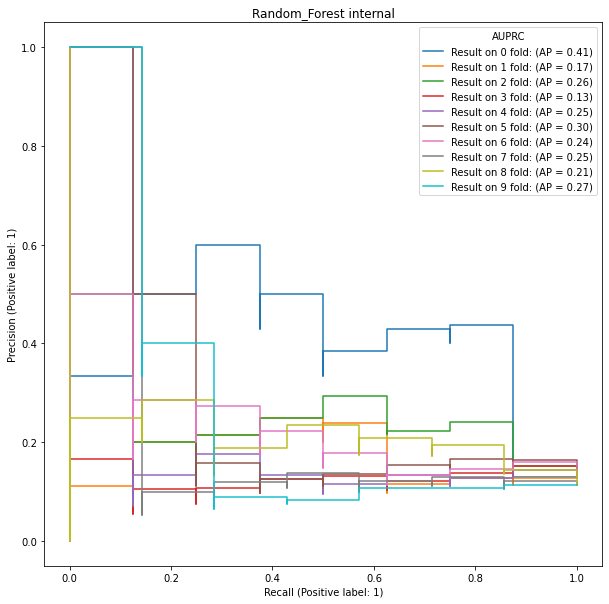

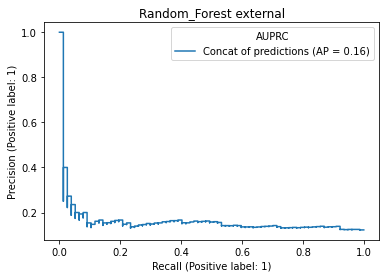

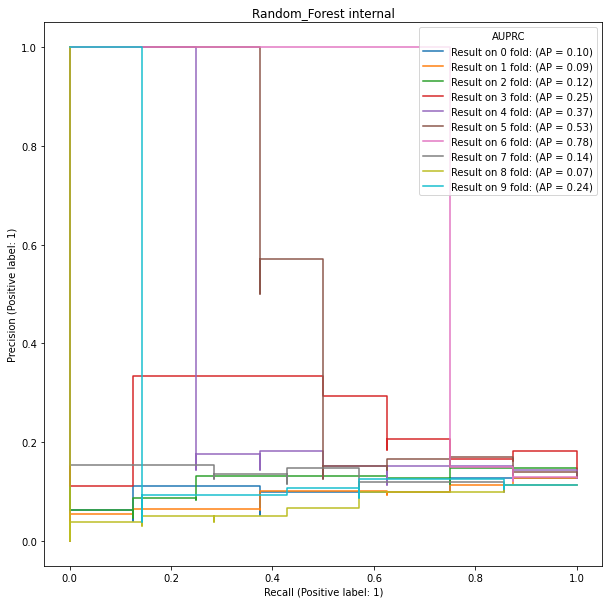

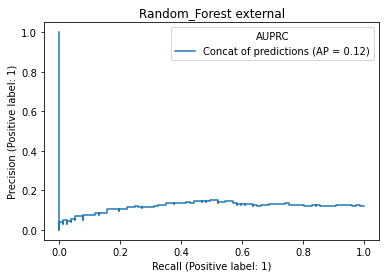

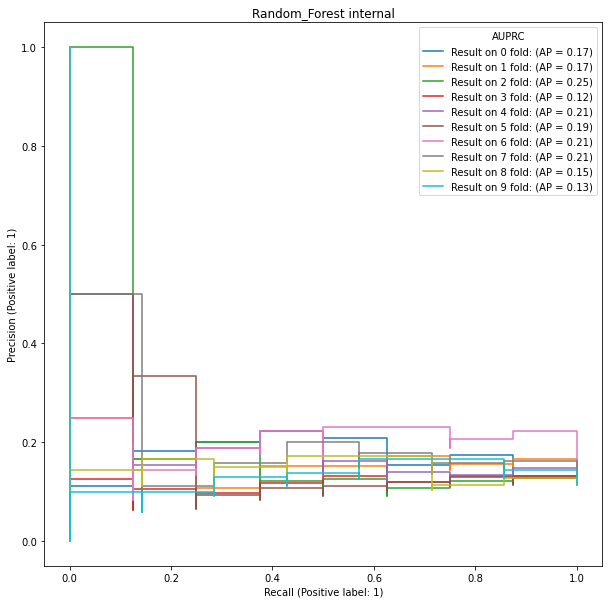

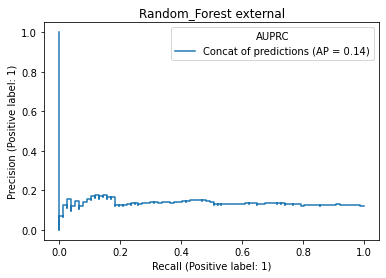

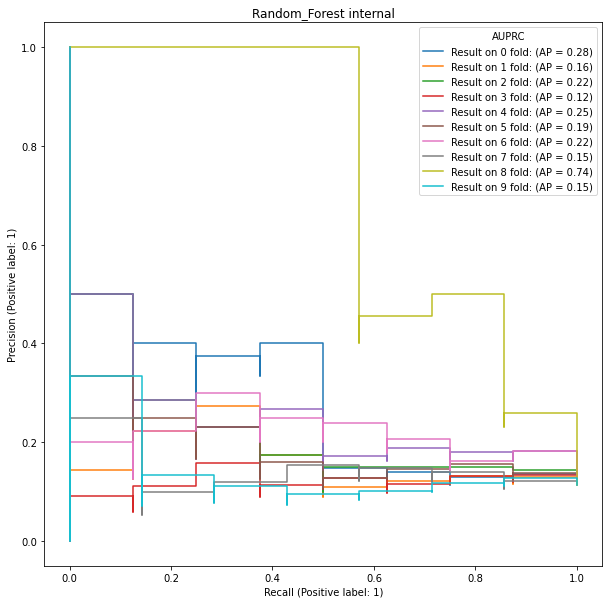

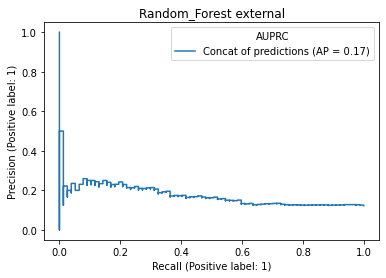

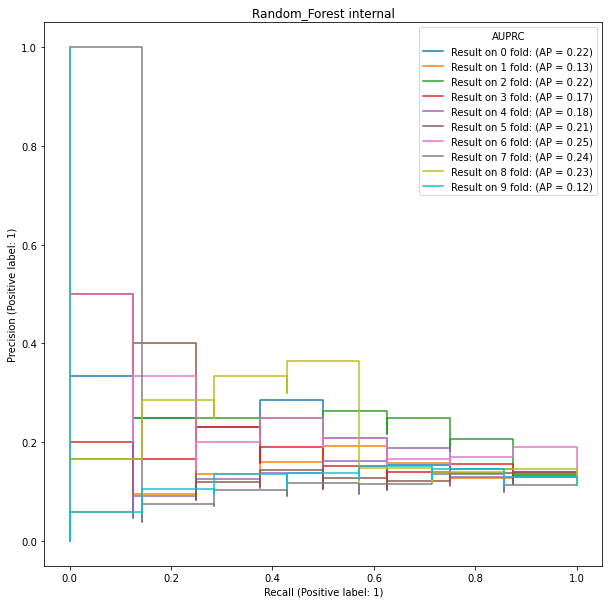

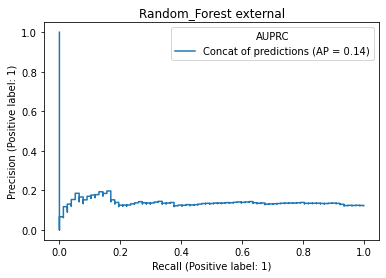

In [41]:
dataset_list = ['mirna']
mirna_file_name = ['Result/Many_Feature_Selection_notebook/mirna/mirna.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine', 'mrmr']

!mkdir 'Result/Many_Feature_Selection_notebook/mirna'
create_result_json(result_dict, feature_selection_list, mirna_file_name, dataset_list, label, datasets)

# Create concatenation of all dataset

In [42]:
dataset_whole_dataset = pd.concat([datasets['cnv'], datasets['proteins'], datasets['mrna'], datasets['mirna']], axis=1)
datasets['whole_dataset'] = dataset_whole_dataset

# Create whole dataset result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

Running training : 0it [00:00, ?it/s]
Running whole_dataset training :   0%|                    | 0/3 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name Result/Many_Feature_Selection_notebook/whole_dataset/whole_dataset.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [03:14, 194.01s/it]

Running fold : 2it [06:32, 196.55s/it]

Running fold : 3it [09:07, 177.79s/it]

Running fold : 4it [12:11, 179.95s/it]

Running fold : 5it [13:57, 153.48s/it]

Running fold : 6it [16:01, 143.57s/it]

Running fold : 7it [18:25, 143.44s/it]

Running fold : 8it [21:24, 154.87s/it]

Running fold : 9it [23:08, 138.82s/it]

Running fold : 10it [24:27, 120.48s/it]

                                       
Running whole_dataset training :  33%|███▎      | 1/3 [24:27<48:55, 1467.61s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name Result/Many_Feature_Selection_notebook/whole_dataset/whole_dataset.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:11, 11.67s/it]

Running fold : 2it [00:23, 11.78s/it]

Running fold : 3it [00:35, 11.89s/it]

Running fold : 4it [00:46, 11.67s/it]

Running fold : 5it [00:58, 11.76s/it]

Running fold : 6it [01:10, 11.78s/it]

Running fold : 7it [01:22, 11.76s/it]

Running fold : 8it [01:34, 11.83s/it]

Running fold : 9it [01:46, 11.87s/it]

Running fold : 10it [01:58, 11.88s/it]

                                      
Running whole_dataset training :  67%|███████▎   | 2/3 [26:25<11:13, 673.89s/it]

TECNICA DI FS check boruta
file name Result/Many_Feature_Selection_notebook/whole_dataset/whole_dataset.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [01:11, 71.70s/it]

execute boruta




Running fold : 2it [02:26, 73.52s/it]

execute boruta




Running fold : 3it [03:40, 73.86s/it]

execute boruta




Running fold : 4it [04:58, 75.25s/it]

execute boruta




Running fold : 5it [06:10, 74.21s/it]

execute boruta




Running fold : 6it [07:22, 73.38s/it]

execute boruta




Running fold : 7it [08:33, 72.81s/it]

execute boruta




Running fold : 8it [09:45, 72.57s/it]

execute boruta




Running fold : 9it [10:58, 72.55s/it]

execute boruta




Running fold : 10it [12:11, 72.83s/it]

                                      
Running whole_dataset training : 100%|███████████| 3/3 [38:37<00:00, 700.45s/it]


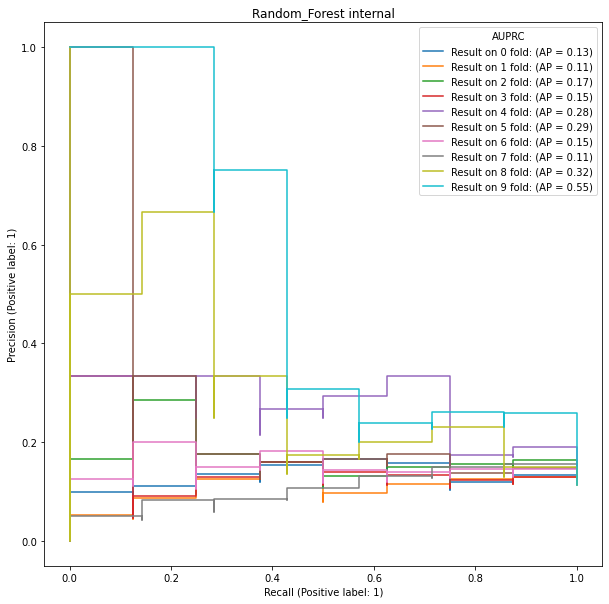

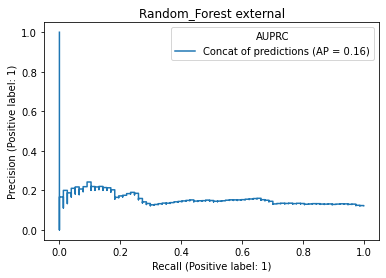

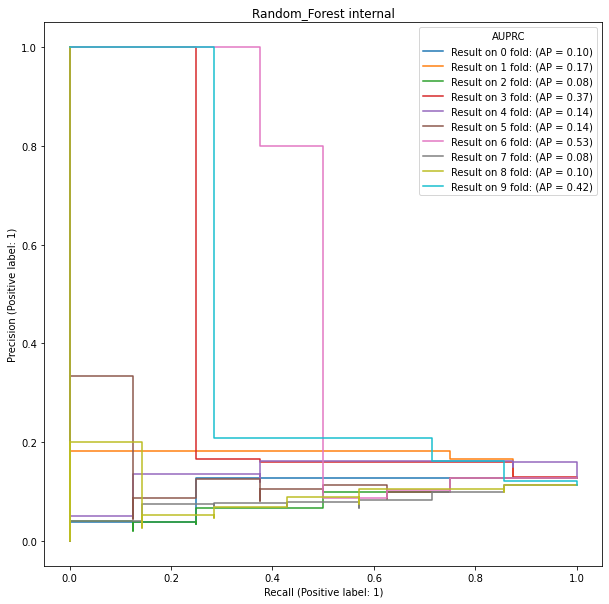

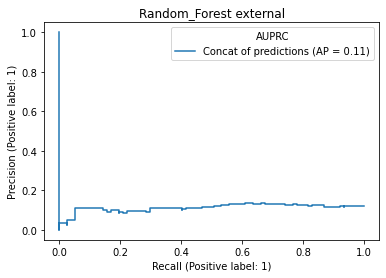

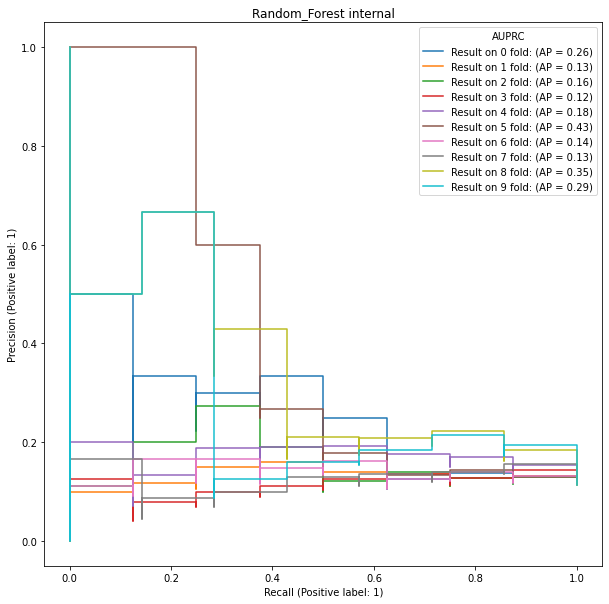

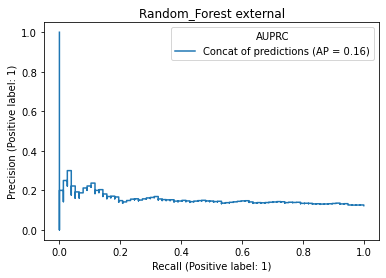

In [43]:
dataset_list = ['whole_dataset']
whole_dataset_file_name = ['Result/Many_Feature_Selection_notebook/whole_dataset/whole_dataset.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap','boruta']
#,'mine']
#, 'mrmr']

!mkdir 'Result/Many_Feature_Selection_notebook/whole_dataset'
create_result_json(result_dict, feature_selection_list, whole_dataset_file_name, dataset_list, label, datasets)